# PART A

__A.__ Perform an Fst scan between sets of populations in a sliding window of 100 SNP positions, including at least the contrast between Africa and Europe, between Europe and East Asia, and between East Asia and Africa. Identify the 10 strongest Fst outlier regions in each case. Identify their genomic position and the genes covered by these Fst peaks. Discuss potential adaptive explanations.

You can obtain the allele frequencies at each position from the haplotype data. Then, you can estimate FST by comparing the expected heterozygosity within population (Hs) and across populations (Ht).

In [2]:
# load packages

library(tidyverse)
library(rehh)
library(repr)
library(gridExtra)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.6     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [23]:
get_coords  <- function(data){
    min  <- min(data$first_snp_pos)
    max  <- max(data$last_snp_pos)
    return(c(min, max))
}

In [3]:
#read in the data

snps <- read.table("snps_filtered.txt", sep = '\t')
colnames(snps) = c("id", "chr", "pos", "ANC", "DER")
snps <- snps %>% arrange(pos) 
head(snps)

# snps %>% filter(is.na(ANC))
# snps %>% filter(is.na(DER))

,id,chr,pos,ANC,DER
,<chr>,<chr>,<int>,<chr>,<chr>
1,X:X_365712,X,365712,A,G
2,X:X_400000,X,400000,T,C
3,X:X_400108,X,400108,A,G
4,X:X_400132,X,400132,T,G
5,X:X_400148,X,400148,A,G
6,X:X_400303,X,400303,C,G


## Convert to class haplohh

In [3]:
# data2haplohh converts data from input file to an object of class haplohh

print("Africa")
hap_AF <-data2haplohh(hap_file="genotypes_AF",
                      map_file="snps_filtered.txt",
                      allele_coding="map", 
                      min_perc_geno.mrk=100,
                      min_perc_geno.hap=100,
                      haplotype.in.columns=TRUE,
                      chr.name="X")

print("West Eurasia")
hap_WE <-data2haplohh(hap_file="genotypes_WE",
                      map_file="snps_filtered.txt",
                      allele_coding="map", 
                      min_perc_geno.mrk=100,
                      min_perc_geno.hap=100,
                      haplotype.in.columns=TRUE,
                      chr.name="X")

print("East Asia")
hap_EA <-data2haplohh(hap_file="genotypes_EA",
                      map_file="snps_filtered.txt",
                      allele_coding="map", 
                      min_perc_geno.mrk=100,
                      min_perc_geno.hap=100,
                      haplotype.in.columns=TRUE,
                      chr.name="X")

[1] "Africa"
* Reading input file(s) *
Map info: 411892 markers declared for chromosome X .
Haplotype input file in transposed format assumed.
Alleles are being recoded according to fourth and fifth column of map file.
* Filtering data *
Discard haplotypes with less than 100 % of genotyped markers.
No haplotype discarded.
Discard markers genotyped on less than 100 % of haplotypes.
No marker discarded.
Data consists of 21 haplotypes and 411892 markers.
Number of mono-, bi-, multi-allelic markers:
1 2 
174849 237043 
[1] "West Eurasia"
* Reading input file(s) *
Map info: 411892 markers declared for chromosome X .
Haplotype input file in transposed format assumed.
Alleles are being recoded according to fourth and fifth column of map file.
* Filtering data *
Discard haplotypes with less than 100 % of genotyped markers.
No haplotype discarded.
Discard markers genotyped on less than 100 % of haplotypes.
No marker discarded.
Data consists of 44 haplotypes and 411892 markers.
Number of mono-, 

__Q1. How many haplotypes and snps are found in each population?__

Africa: Data consists of 21 haplotypes and 411892 SNPs/markers.

WestEurope: Data consists of 44 haplotypes and 411892 SNPs/markers.

EastAsia: Data consists of 24 haplotypes and 411892 SNPs/markers.

SouthAsia: Data consists of 30 haplotypes and 411892 SNPs/markers.

America: Data consists of 6 haplotypes and 411892 SNPs/markers.

CentralAsiaSiberia: Data consists of 8 haplotypes and 411892 SNPs/markers.

Ocenia: Data consists of 12 haplotypes and 411892 SNPs/markers.


In [3]:
#write_delim(res_scan_AF, "res_scan_AF.csv", delim = "\t")
#write_delim(res_scan_WE, "res_scan_WE.csv", delim = "\t")

res_scan_AF  <- read.csv("res_scan_AF.csv", sep = "\t", header = TRUE)
res_scan_WE  <- read.csv("res_scan_WE.csv", sep = "\t", header = TRUE)
res_scan_EA  <- read.csv("res_scan_EA.csv", sep = "\t", header = TRUE)
res_scan_SA  <- read.csv("res_scan_SA.csv", sep = "\t", header = TRUE)
res_scan_AM  <- read.csv("res_scan_AM.csv", sep = "\t", header = TRUE)
res_scan_CAS  <- read.csv("res_scan_CAS.csv", sep = "\t", header = TRUE)
res_scan_O  <- read.csv("res_scan_O.csv", sep = "\t", header = TRUE)
head(res_scan_AF)

,CHR,POSITION,FREQ_A,FREQ_D,NHAPLO_A,NHAPLO_D,IHH_A,IHH_D,IES,INES
,<chr>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,X,365712,1.00000000,0.00000000,21,0,NA,0,NA,NA
2,X,400000,0.95238095,0.04761905,20,1,NA,0,NA,NA
3,X,400108,0.04761905,0.95238095,1,20,0,NA,NA,NA
4,X,400132,0.76190476,0.23809524,16,5,NA,NA,NA,NA
5,X,400148,1.00000000,0.00000000,21,0,NA,0,NA,NA
6,X,400303,0.61904762,0.38095238,13,8,NA,NA,NA,NA


In [5]:
# combine data

res_scan_AF <- res_scan_AF %>% mutate(region = rep("Africa", nrow(res_scan_AF)))
res_scan_WE <- res_scan_WE %>% mutate(region = rep("WestEurasia", nrow(res_scan_WE)))
res_scan_EA <- res_scan_EA %>% mutate(region = rep("EastAsia", nrow(res_scan_EA)))
res_scan_SA <- res_scan_SA %>% mutate(region = rep("SouthAsia", nrow(res_scan_SA)))
res_scan_AM <- res_scan_AM %>% mutate(region = rep("America", nrow(res_scan_AM)))
res_scan_CAS <- res_scan_CAS %>% mutate(region = rep("CentralAsiaSiberia", nrow(res_scan_CAS)))
res_scan_O <- res_scan_O %>% mutate(region = rep("Oceania", nrow(res_scan_O)))

res_scan  <- bind_rows(res_scan_AF, res_scan_WE, res_scan_EA, res_scan_SA, res_scan_AM, res_scan_CAS, res_scan_O)
head(res_scan)


,CHR,POSITION,FREQ_A,FREQ_D,NHAPLO_A,NHAPLO_D,IHH_A,IHH_D,IES,INES,region
,<chr>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,X,365712,1.00000000,0.00000000,21,0,NA,0,NA,NA,Africa
2,X,400000,0.95238095,0.04761905,20,1,NA,0,NA,NA,Africa
3,X,400108,0.04761905,0.95238095,1,20,0,NA,NA,NA,Africa
4,X,400132,0.76190476,0.23809524,16,5,NA,NA,NA,NA,Africa
5,X,400148,1.00000000,0.00000000,21,0,NA,0,NA,NA,Africa
6,X,400303,0.61904762,0.38095238,13,8,NA,NA,NA,NA,Africa


In [5]:
res_scan <- read.csv("res_scan_all_pop.csv", sep = "\t", header = TRUE)
head(res_scan)

,CHR,POSITION,FREQ_A,FREQ_D,NHAPLO_A,NHAPLO_D,IHH_A,IHH_D,IES,INES,region
,<chr>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,X,365712,1.00000000,0.00000000,21,0,NA,0,NA,NA,Africa
2,X,400000,0.95238095,0.04761905,20,1,NA,0,NA,NA,Africa
3,X,400108,0.04761905,0.95238095,1,20,0,NA,NA,NA,Africa
4,X,400132,0.76190476,0.23809524,16,5,NA,NA,NA,NA,Africa
5,X,400148,1.00000000,0.00000000,21,0,NA,0,NA,NA,Africa
6,X,400303,0.61904762,0.38095238,13,8,NA,NA,NA,NA,Africa


## Histograms of the allele frequencies

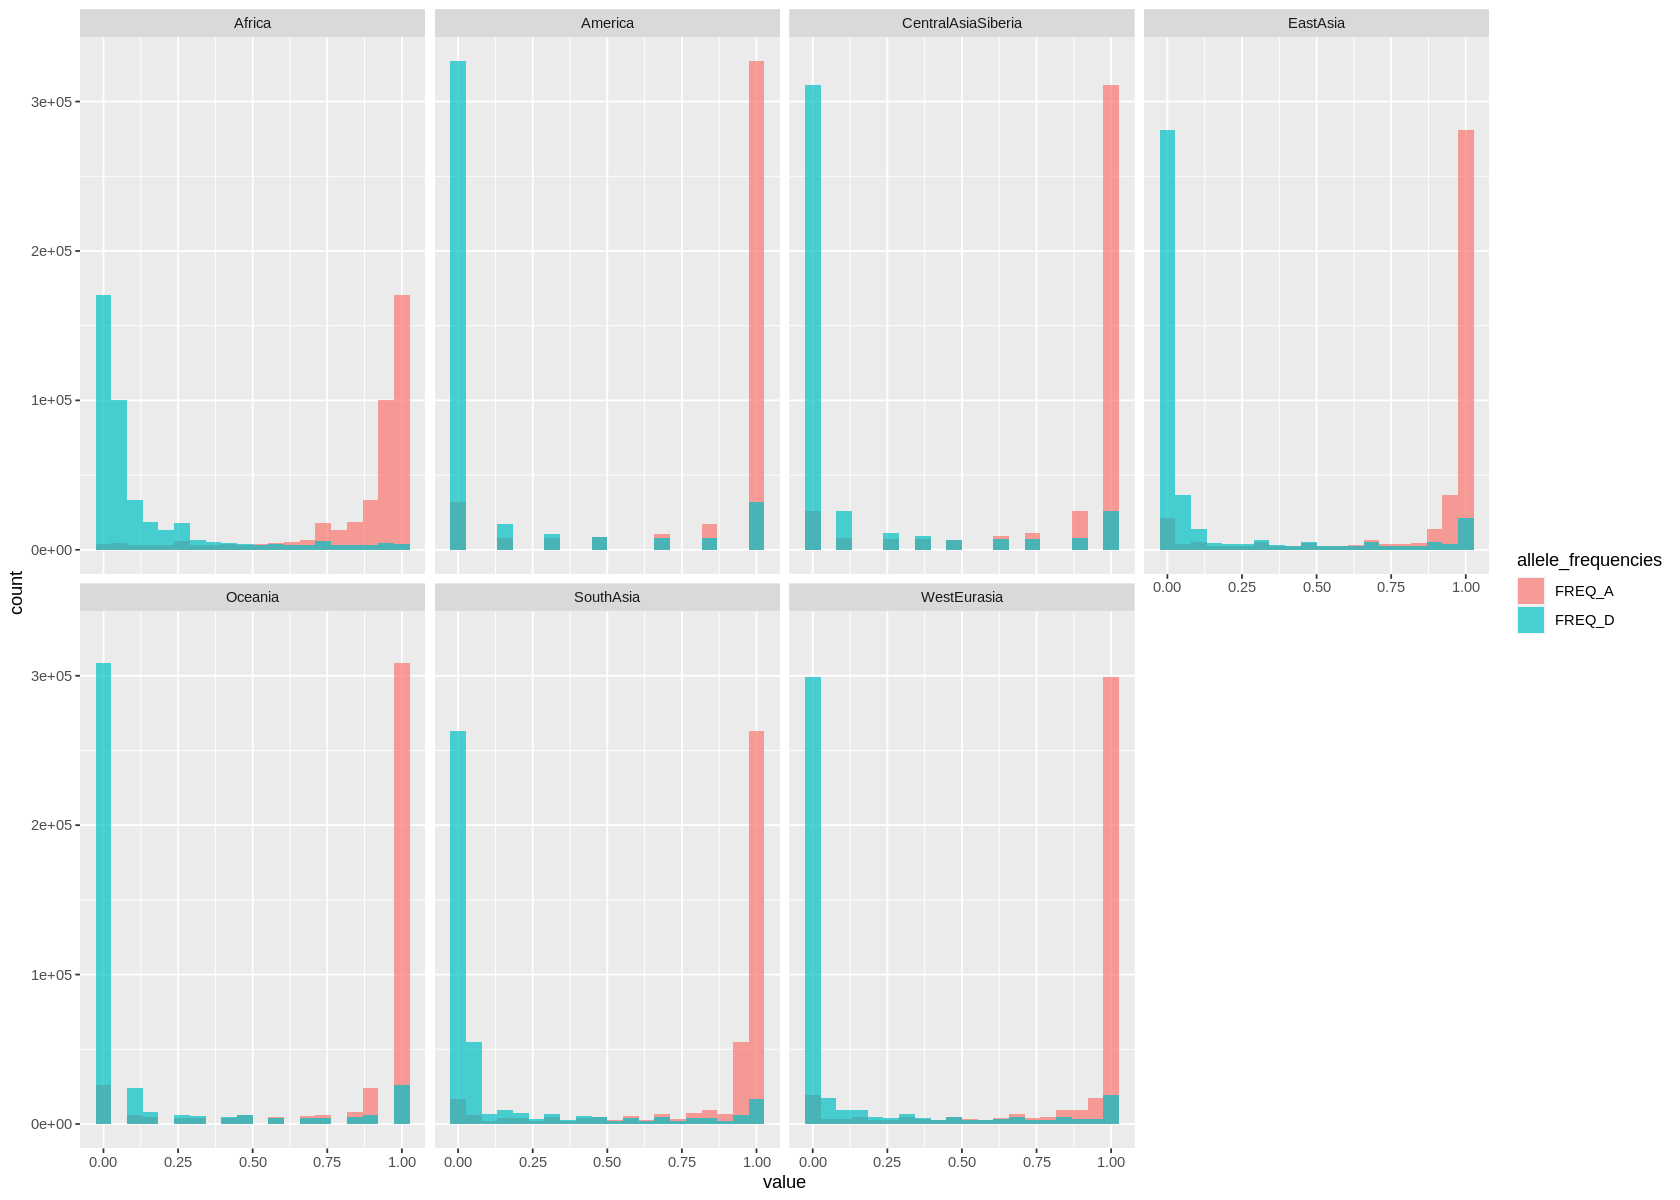

In [6]:
options(repr.plot.width=14, repr.plot.height=10)


res_scan  %>% select(FREQ_A, FREQ_D, region) %>% 
    pivot_longer(cols = c(FREQ_A, FREQ_D), names_to = "allele_frequencies")  %>% 
    ggplot() + geom_histogram(aes(x = value, fill = allele_frequencies), alpha = 0.7, bins = 20, position="identity") + 
    facet_wrap(~region, nrow = 2)

## Functions to calculate FST

In [8]:
FST_per_position <- function(res_scan, pops){
    chr = NULL
    snp_pos = NULL
    H_S = NULL
    H_T = NULL
    FST = NULL
    print("here")
    subset_pops <- res_scan %>% filter(region %in% pops)
    
    for (i in 1:(nrow(snps))){
        chr[i] <- snps$chr[i]
        snp_pos[i] <- snps$pos[i]
        subset <- subset_pops %>% filter(POSITION == snp_pos[i])
        H_S[i] <- mean(2*subset$FREQ_A*subset$FREQ_D)
        H_T[i] <- 2*mean(subset$FREQ_A)*mean(subset$FREQ_D)
        FST[i] <- (H_T[i] - H_S[i])/H_T[i]                              
    }

    Fst  <- tibble(chr =  chr,
                   snp_pos = snp_pos, 
                   H_S = H_S, 
                   H_T = H_T, 
                   FST = FST)
    return(Fst)
}

In [9]:
avg_FST_in_sliding_windows <- function(FST_file, pops, window_size = 100){
    chr = NULL
    first_snp_pos = NULL
    last_snp_pos = NULL
    avg_FST = NULL
    print("here")
    ws_ = window_size - 1

    for (i in 1:(nrow(FST_file) - ws_)){
        chr[i] <- FST_file$chr[i]
        first_snp_pos[i] <- FST_file$snp_pos[i]
        last_snp_pos[i] <- FST_file$snp_pos[i + ws_]
        subset <- FST_file %>% filter(between(snp_pos, first_snp_pos[i], last_snp_pos[i]))
        avg_FST[i] <- mean(subset$FST)                              
    }

    Fst  <- tibble(chr =  chr,
                   first_snp_pos = first_snp_pos, 
                   last_snp_pos = last_snp_pos, 
                   avg_FST)
    return(Fst)
}

### Calculating FST per position

In [7]:
#between Africa and Europe
print("Africa - WestEurasia")
FST_AF_WE_per_position <- FST_per_position(res_scan, c("Africa", "WestEurasia"))
head(FST_AF_WE_per_position)
write_delim(FST_AF_WE_per_position, "FST_AF_WE_per_position.csv", delim = "\t")

missing_FST_AF_WE  <- which(is.na(FST_AF_WE_per_position$FST))
head(missing_FST_AF_WE)
length(missing_FST_AF_WE)

FST_AF_WE_per_position <- FST_AF_WE_per_position %>% mutate(FST = coalesce(FST, 0))

#between Europe and East Asia
print("WestEurasia - EastAsia")
FST_WE_EA_per_position <- FST_per_position(res_scan, c("WestEurasia", "EastAsia"))
head(FST_WE_EA_per_position)
write_delim(FST_WE_EA_per_position, "FST_WE_EA_per_position.csv", delim = "\t")

missing_FST_WE_EA <- which(is.na(FST_WE_EA_per_position$FST))
head(missing_FST_WE_EA)
length(missing_FST_WE_EA)

FST_WE_EA_per_position <- FST_WE_EA_per_position %>% mutate(FST = coalesce(FST, 0))

#between East Asia and Africa.
print("EastAsia - Africa")
FST_EA_AF_per_position <- FST_per_position(res_scan, c("EastAsia", "Africa"))
head(FST_EA_AF_per_position)
write_delim(FST_EA_AF_per_position, "FST_EA_AF_per_position.csv", delim = "\t")

missing_FST_EA_AF <- which(is.na(FST_EA_AF_per_position$FST))
head(missing_FST_EA_AF)
length(missing_FST_EA_AF)

FST_EA_AF_per_position <- FST_EA_AF_per_position %>% mutate(FST = coalesce(FST, 0))


[1] "Africa - WestEurasia"


ERROR: Error in FST_per_position(res_scan, c("Africa", "WestEurasia")): could not find function "FST_per_position"


### FST value distributions

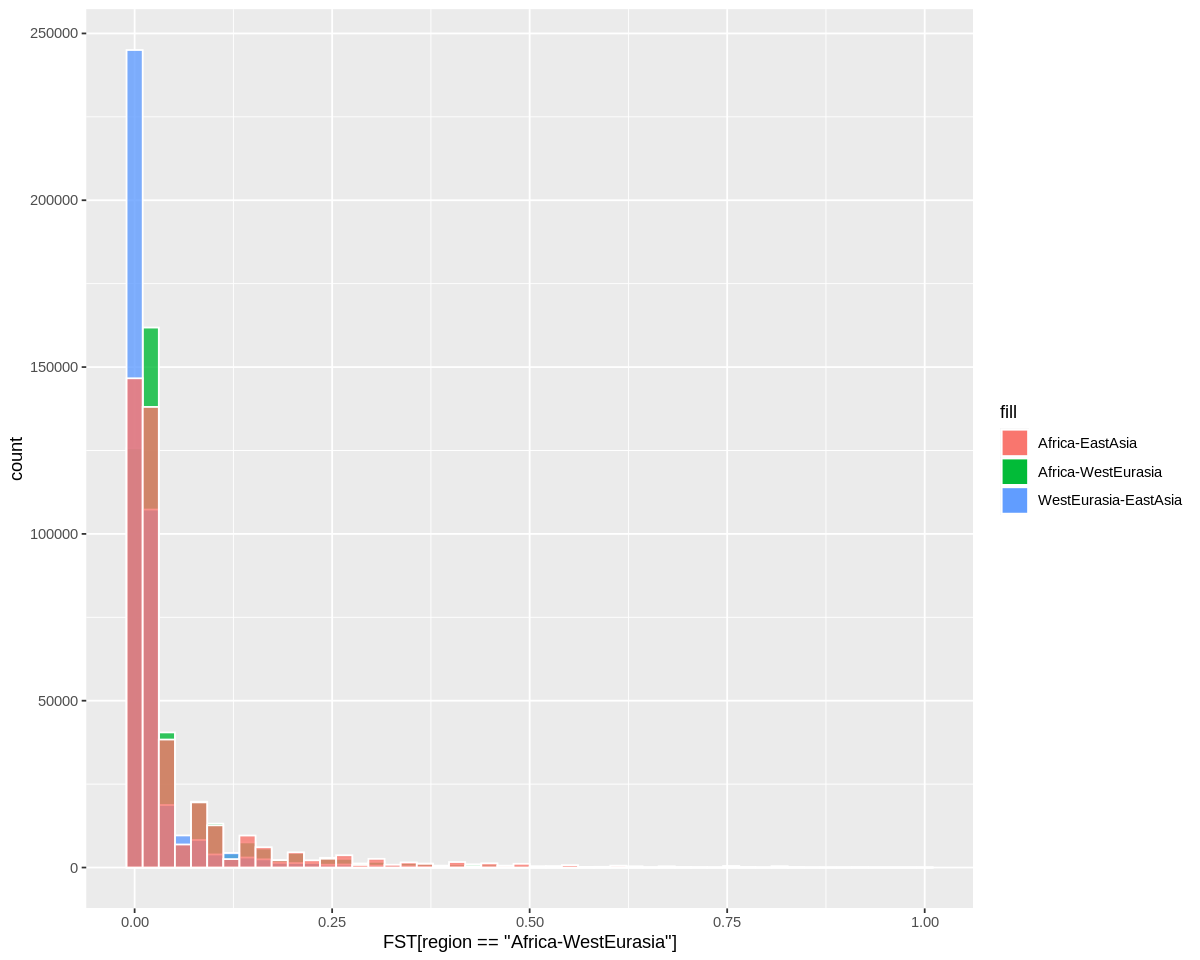

In [6]:
options(repr.plot.width=10, repr.plot.height=8)

FST_AF_WE_per_position <- FST_AF_WE_per_position %>% 
    mutate(region = rep("Africa-WestEurasia", nrow(FST_AF_WE_per_position)))
FST_WE_EA_per_position <- FST_WE_EA_per_position %>% 
    mutate(region = rep("WestEurasia-EastAsia", nrow(FST_WE_EA_per_position)))
FST_EA_AF_per_position <- FST_EA_AF_per_position  %>% 
    mutate(region = rep("Africa-EastAsia", nrow(FST_EA_AF_per_position)))

FST_per_pos_3S <- bind_rows(FST_AF_WE_per_position, FST_WE_EA_per_position, FST_EA_AF_per_position)

colors <- c("Africa-WestEurasia" = "seagreen3", "WestEurasia-EastAsia" = "cadetblue2", "Africa-EastAsia" = "indianred2")

ggplot() + 
    geom_histogram(data = FST_AF_WE_per_position, aes(x = FST[region == "Africa-WestEurasia"], fill = "Africa-WestEurasia"), bins = 50, color = "white", alpha = 0.8) + 
    geom_histogram(data = FST_WE_EA_per_position, aes(x = FST[region == "WestEurasia-EastAsia"], fill = "WestEurasia-EastAsia"), bins = 50, color = "white", alpha = 0.8) +
    geom_histogram(data = FST_EA_AF_per_position, aes(x = FST[region == "Africa-EastAsia"], fill = "Africa-EastAsia"), bins = 50, color = "white", alpha = 0.8) + 
labs(color = "Legend") + 
scale_color_manual(values = colors)

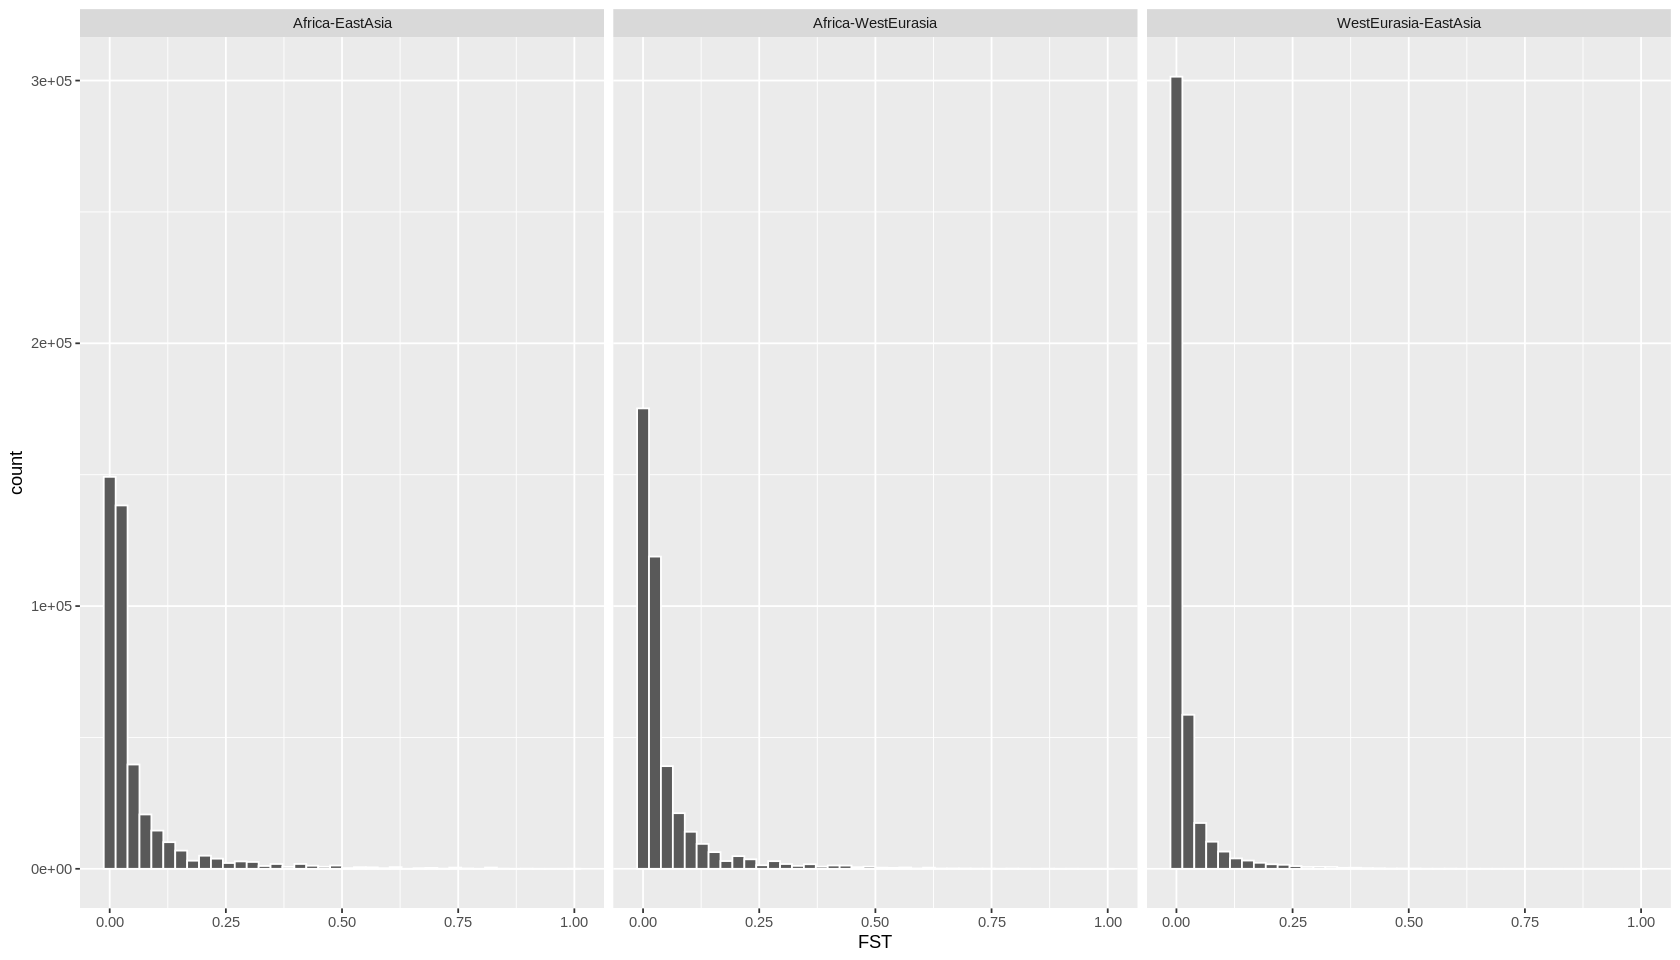

In [7]:
options(repr.plot.width=14, repr.plot.height=8)

ggplot(FST_per_pos_3S) + 
    geom_histogram(aes(x = FST), bins = 40, color = "white") + facet_wrap(~region)

### Calculating average FST over positions in the sliding window

In [5]:
# read in the position FST data

FST_AF_WE_per_position <- read.csv("FST_AF_WE_per_position.csv", sep = "\t", header = TRUE)
head(FST_AF_WE_per_position)
nrow(FST_AF_WE_per_position)

missing_FST_AF_WE  <- which(is.na(FST_AF_WE_per_position$FST))
length(missing_FST_AF_WE)

FST_AF_WE_per_position <- FST_AF_WE_per_position %>% mutate(FST = coalesce(FST, 0))



FST_WE_EA_per_position <- read.csv("FST_WE_EA_per_position.csv", sep = "\t", header = TRUE)
head(FST_WE_EA_per_position)
nrow(FST_WE_EA_per_position)

missing_FST_WE_EA <- which(is.na(FST_WE_EA_per_position$FST))
length(missing_FST_WE_EA)

FST_WE_EA_per_position <- FST_WE_EA_per_position %>% mutate(FST = coalesce(FST, 0))



FST_EA_AF_per_position <- read.csv("FST_EA_AF_per_position.csv", sep = "\t", header = TRUE)
head(FST_EA_AF_per_position)
nrow(FST_EA_AF_per_position)

missing_FST_EA_AF <- which(is.na(FST_EA_AF_per_position$FST))
length(missing_FST_EA_AF)

FST_EA_AF_per_position <- FST_EA_AF_per_position %>% mutate(FST = coalesce(FST, 0))



,chr,snp_pos,H_S,H_T,FST
,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,X,365712,0.00000000,0.00000000,NA
2,X,400000,0.04535147,0.04648526,0.02439024
3,X,400108,0.23285147,0.47952098,0.51440816
4,X,400132,0.18140590,0.20975057,0.13513514
5,X,400148,0.00000000,0.00000000,NA
6,X,400303,0.46723262,0.49985008,0.06525448


[1] 411892

[1] 105192

,chr,snp_pos,H_S,H_T,FST
,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,X,365712,0.0000000,0.0000000,NA
2,X,400000,0.0000000,0.0000000,NA
3,X,400108,0.4097222,0.4131944,0.008403361
4,X,400132,0.0000000,0.0000000,NA
5,X,400148,0.0000000,0.0000000,NA
6,X,400303,0.4657800,0.4999354,0.068319773


[1] 411892

[1] 222489

,chr,snp_pos,H_S,H_T,FST
,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,X,365712,0.00000000,0.00000000,NA
2,X,400000,0.04535147,0.04648526,2.439024e-02
3,X,400108,0.26757370,0.45918367,4.172840e-01
4,X,400132,0.18140590,0.20975057,1.351351e-01
5,X,400148,0.00000000,0.00000000,NA
6,X,400303,0.47020266,0.47022038,3.767472e-05


[1] 411892

[1] 131113

In [ ]:
#between Africa and Europe
print("Africa - WestEurasia")
FST_AF_WE_averaged_in_sliding_window <- avg_FST_in_sliding_windows(FST_AF_WE_per_position, c("Africa", "WestEurasia"))
head(FST_AF_WE_averaged_in_sliding_window)
write_delim(FST_AF_WE_averaged_in_sliding_window, "FST_AF_WE_averaged_in_sliding_window.csv", delim = "\t")

#between Europe and East Asia
print("WestEurasia - EastAsia")
FST_WE_EA_averaged_in_sliding_window <- avg_FST_in_sliding_windows(FST_WE_EA_per_position, c("WestEurasia", "EastAsia"))
head(FST_WE_EA_averaged_in_sliding_window)
write_delim(FST_WE_EA_averaged_in_sliding_window, "FST_WE_EA_averaged_in_sliding_window.csv", delim = "\t")

#between East Asia and Africa.
print("EastAsia - Africa")
FST_EA_AF_averaged_in_sliding_window <- avg_FST_in_sliding_windows(FST_EA_AF_per_position, c("EastAsia", "Africa"))
head(FST_EA_AF_averaged_in_sliding_window)
write_delim(FST_EA_AF_averaged_in_sliding_window, "FST_EA_AF_averaged_in_sliding_window.csv", delim = "\t")


In [8]:
# read in the averaged FST data

FST_AF_WE_averaged_in_sliding_window <- read.csv("FST_AF_WE_averaged_in_sliding_window.csv", sep = "\t", header = TRUE)
head(FST_AF_WE_averaged_in_sliding_window)

FST_WE_EA_averaged_in_sliding_window <- read.csv("FST_WE_EA_averaged_in_sliding_window.csv", sep = "\t", header = TRUE)
head(FST_WE_EA_averaged_in_sliding_window)

FST_EA_AF_averaged_in_sliding_window <- read.csv("FST_EA_AF_averaged_in_sliding_window.csv", sep = "\t", header = TRUE)
head(FST_EA_AF_averaged_in_sliding_window)

,chr,first_snp_pos,last_snp_pos,avg_FST
,<chr>,<int>,<int>,<dbl>
1,X,365712,452218,0.04586912
2,X,400000,452221,0.04586912
3,X,400108,452231,0.04562522
4,X,400132,454014,0.04072504
5,X,400148,454116,0.03937369
6,X,400303,454355,0.03937369


,chr,first_snp_pos,last_snp_pos,avg_FST
,<chr>,<int>,<int>,<dbl>
1,X,365712,452218,0.01445346
2,X,400000,452221,0.01445346
3,X,400108,452231,0.01445346
4,X,400132,454014,0.01436942
5,X,400148,454116,0.01458219
6,X,400303,454355,0.01458219


,chr,first_snp_pos,last_snp_pos,avg_FST
,<chr>,<int>,<int>,<dbl>
1,X,365712,452218,0.05087873
2,X,400000,452221,0.05087873
3,X,400108,452231,0.05063482
4,X,400132,454014,0.04670589
5,X,400148,454116,0.04556730
6,X,400303,454355,0.04556730


In [12]:
#combine data

FST_AF_WE_averaged_in_sliding_window <- FST_AF_WE_averaged_in_sliding_window %>% 
    mutate(region = rep("Africa - WestEurasia", nrow(FST_AF_WE_averaged_in_sliding_window)))
nrow(FST_AF_WE_averaged_in_sliding_window)
FST_WE_EA_averaged_in_sliding_window <- FST_WE_EA_averaged_in_sliding_window %>% 
    mutate(region = rep("WestEurasia - EastAsia", nrow(FST_WE_EA_averaged_in_sliding_window)))
nrow(FST_WE_EA_averaged_in_sliding_window)

FST_EA_AF_averaged_in_sliding_window <- FST_EA_AF_averaged_in_sliding_window  %>% 
    mutate(region = rep("Africa - EastAsia", nrow(FST_EA_AF_averaged_in_sliding_window)))
nrow(FST_EA_AF_averaged_in_sliding_window)

FST_averaged_in_sliding_window_3S <- bind_rows(FST_AF_WE_averaged_in_sliding_window, FST_WE_EA_averaged_in_sliding_window, FST_EA_AF_averaged_in_sliding_window)
head(FST_averaged_in_sliding_window_3S)

[1] 411793

[1] 411793

[1] 411793

,chr,first_snp_pos,last_snp_pos,avg_FST,region
,<chr>,<int>,<int>,<dbl>,<chr>
1,X,365712,452218,0.04586912,Africa - WestEurasia
2,X,400000,452221,0.04586912,Africa - WestEurasia
3,X,400108,452231,0.04562522,Africa - WestEurasia
4,X,400132,454014,0.04072504,Africa - WestEurasia
5,X,400148,454116,0.03937369,Africa - WestEurasia
6,X,400303,454355,0.03937369,Africa - WestEurasia


### Summary plots of calculated average Fst's for the different population sets

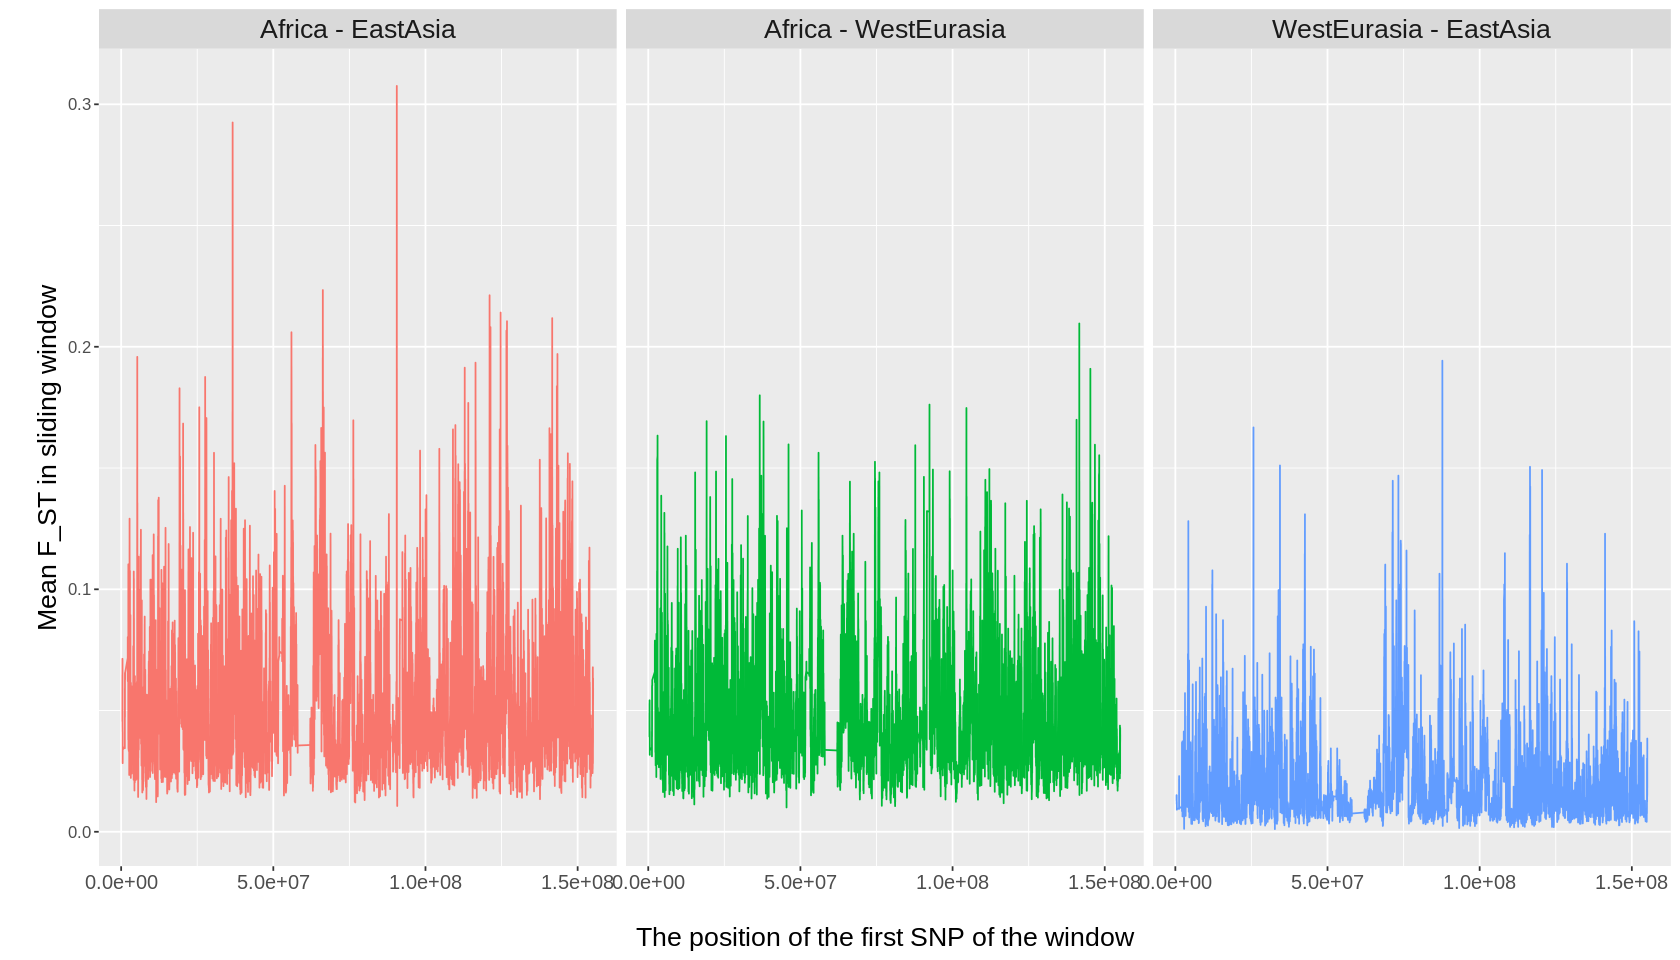

In [17]:
options(repr.plot.width=14, repr.plot.height=8)


ggplot(FST_averaged_in_sliding_window_3S) + 
    geom_line(aes(x = first_snp_pos, y = avg_FST, color = region), show.legend = F) + 
    facet_wrap(~region) +
    theme( 
        axis.text.x = element_text(size = 12), 
        axis.text.y = element_text(size = 10), 
        axis.title=element_text(size=16),
        strip.text.x = element_text(size = 16)
        ) + 
        ylab("\nMean F_ST in sliding window") + 
        xlab("\nThe position of the first SNP of the window")

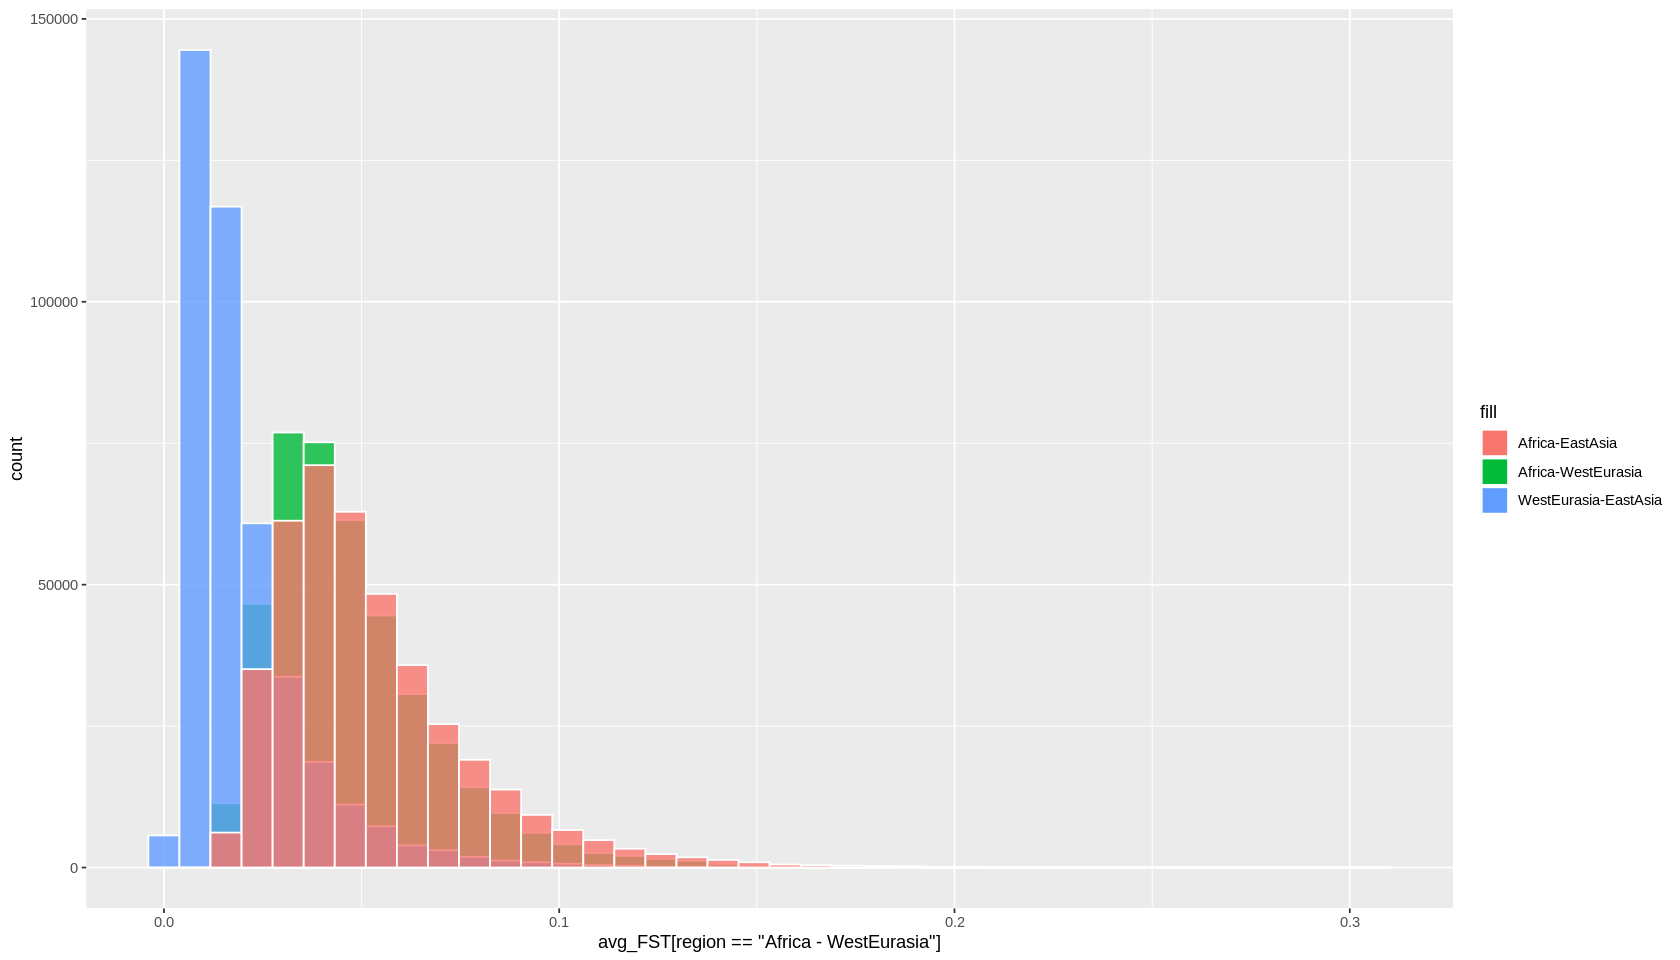

In [22]:
options(repr.plot.width=14, repr.plot.height=8)

# FST distributions

colors <- c("Africa - WestEurasia" = "seagreen3", "WestEurasia - EastAsia" = "cadetblue2", "Africa - EastAsia" = "indianred2")

ggplot() + 
    geom_histogram(data = FST_AF_WE_averaged_in_sliding_window, aes(x = avg_FST[region == "Africa - WestEurasia"], fill = "Africa-WestEurasia"), bins = 40, color = "white", alpha = 0.8) + 
    geom_histogram(data = FST_WE_EA_averaged_in_sliding_window, aes(x = avg_FST[region == "WestEurasia - EastAsia"], fill = "WestEurasia-EastAsia"), bins = 40, color = "white", alpha = 0.8) +
    geom_histogram(data = FST_EA_AF_averaged_in_sliding_window, aes(x = avg_FST[region == "Africa - EastAsia"], fill = "Africa-EastAsia"), bins = 40, color = "white", alpha = 0.8) + 
labs(color = "Legend") + 
scale_color_manual(values = colors)

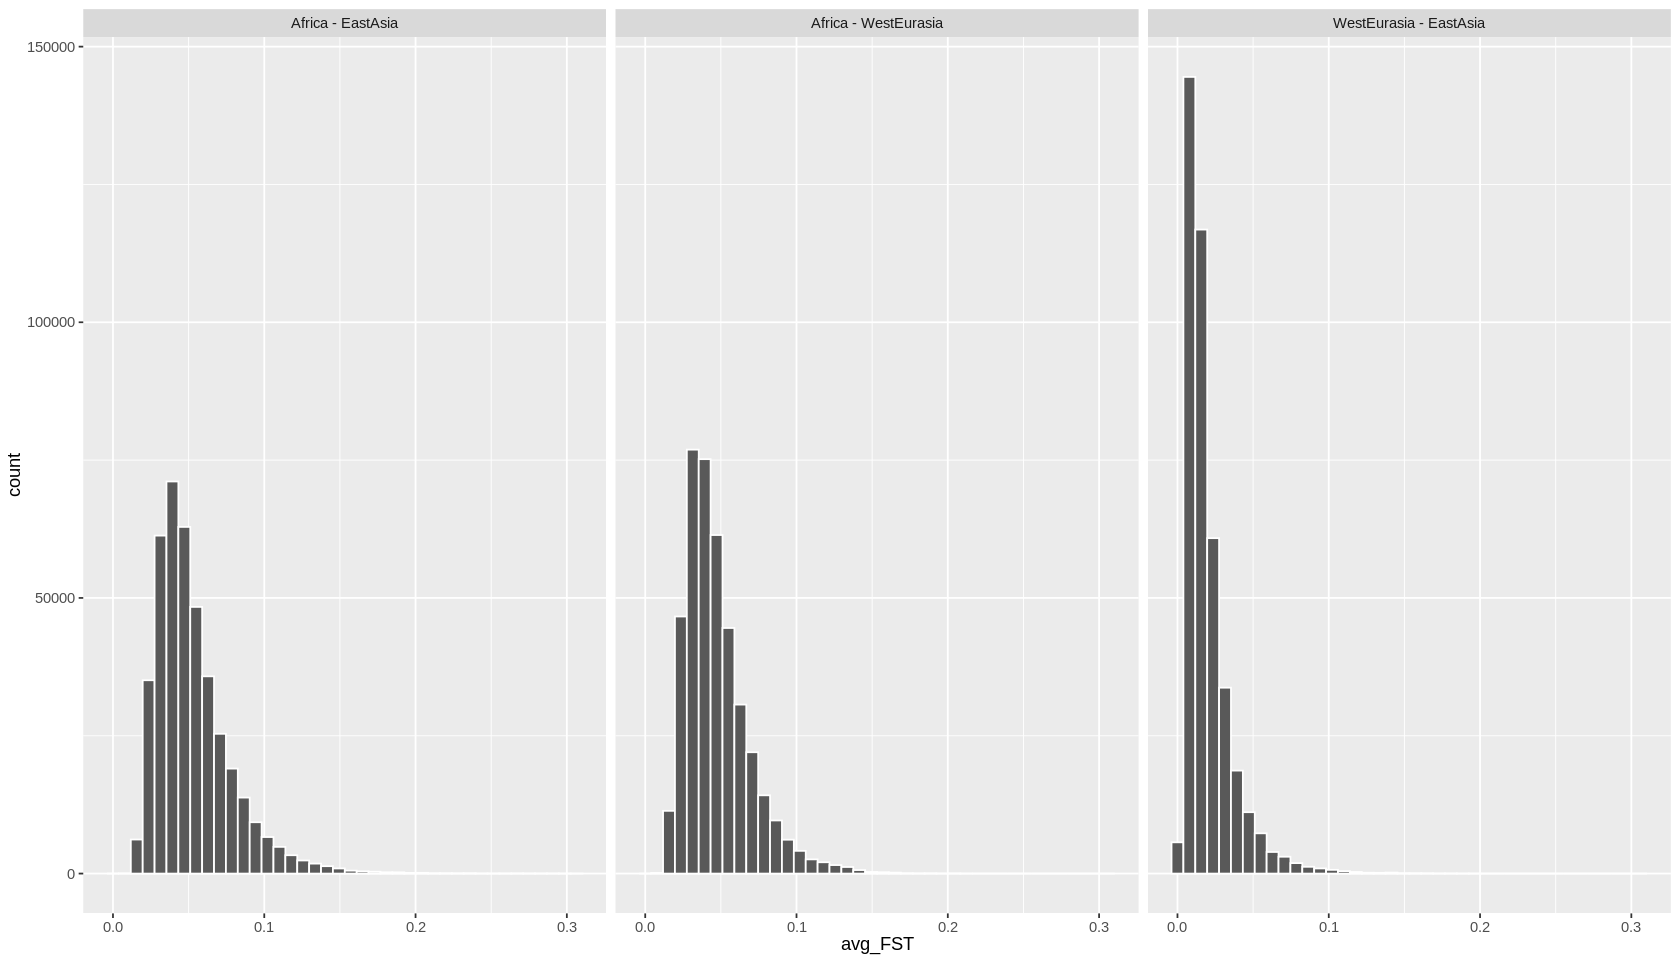

In [23]:
options(repr.plot.width=14, repr.plot.height=8)

ggplot(FST_averaged_in_sliding_window_3S) + 
    geom_histogram(aes(x = avg_FST), bins = 40, color = "white") + facet_wrap(~region) 

### Visualization of significant regions Africa-WestEurasia

,chr,first_snp_pos,last_snp_pos,avg_FST
,<chr>,<int>,<int>,<dbl>
1,X,141639408,141650485,0.2096135
2,X,141641747,141654883,0.2067538
3,X,141638643,141650461,0.2057316
4,X,141640312,141652613,0.2056843
5,X,141641500,141654874,0.2056721
6,X,141640842,141654384,0.2053991


[1] 500


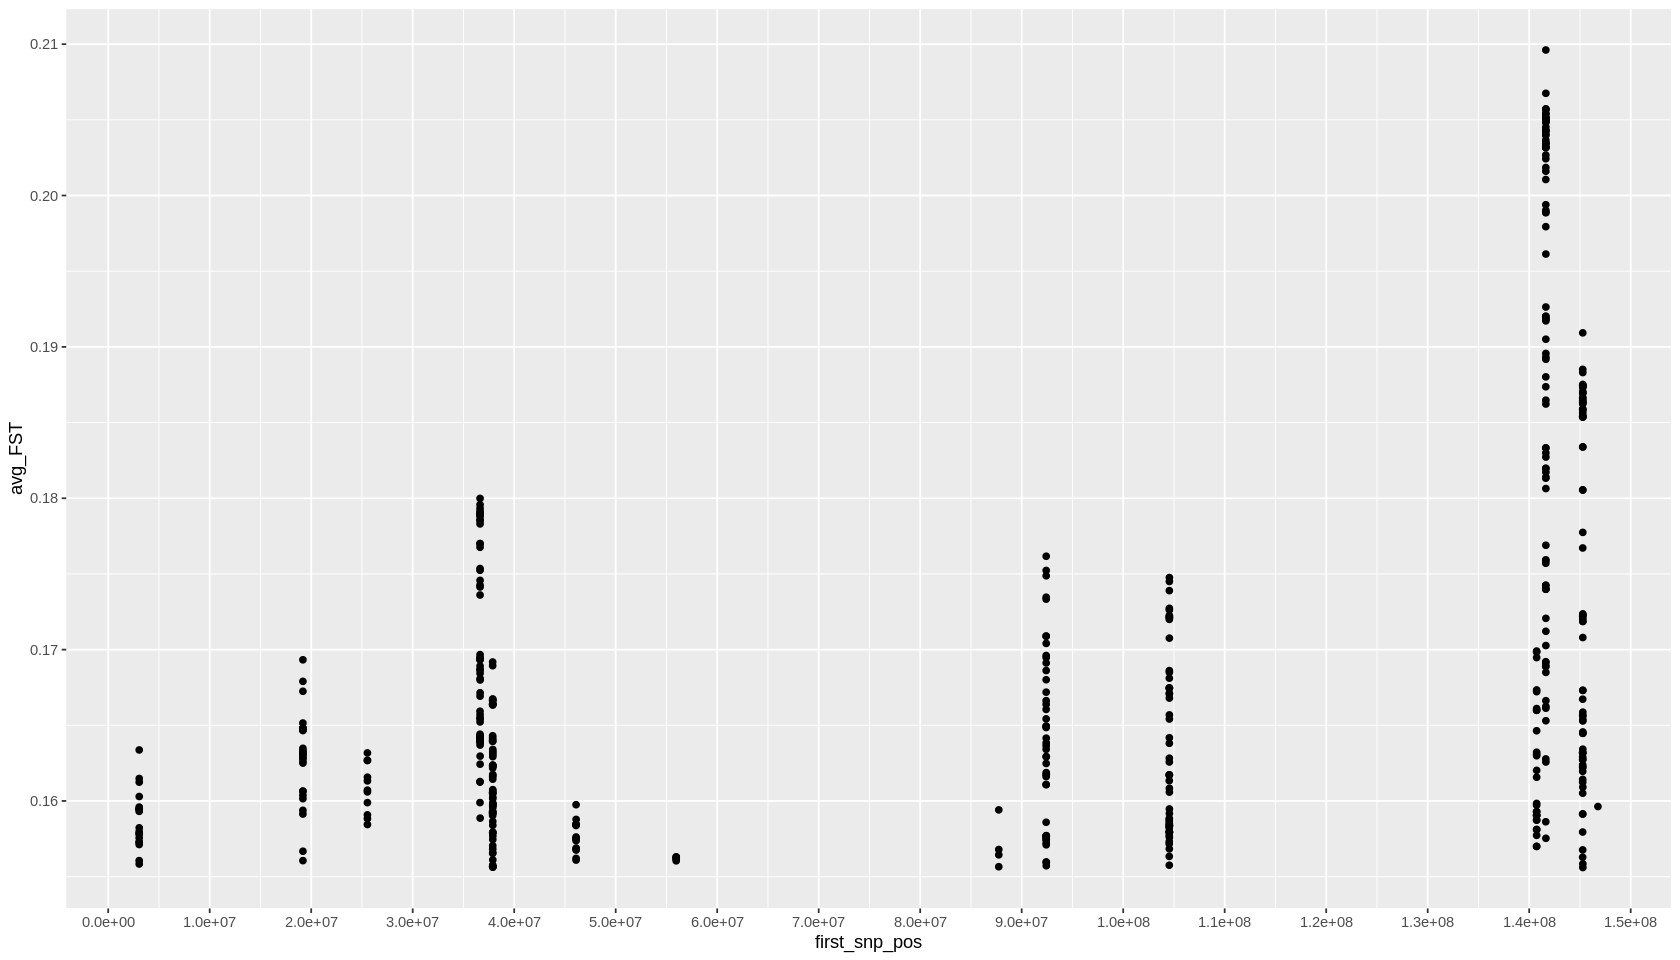

In [28]:
options(repr.plot.width=14, repr.plot.height=8)
# identify 10 strongest Fst outliers in each three (possibly more) cases

FST_AF_WE_avg_in_window <- FST_AF_WE_averaged_in_sliding_window  %>% arrange(desc(avg_FST))
head(FST_AF_WE_avg_in_window)

FST_AF_WE_avg_in_window_high  <- FST_AF_WE_avg_in_window[1:500, ]  
n = nrow(FST_AF_WE_avg_in_window_high)
print(n)

ggplot(FST_AF_WE_avg_in_window_high) + geom_point(aes(x = first_snp_pos, y = avg_FST)) + scale_x_continuous(breaks = seq(0, 1.5e+08, 1e+07))
# avg fst and geom point for this plot

,chr,first_snp_pos,last_snp_pos,avg_FST
,<chr>,<int>,<int>,<dbl>
1,X,141639408,141650485,0.2096135
2,X,141641747,141654883,0.2067538
3,X,141638643,141650461,0.2057316
4,X,141640312,141652613,0.2056843
5,X,141641500,141654874,0.2056721
6,X,141640842,141654384,0.2053991


[1] 124
[1] 193


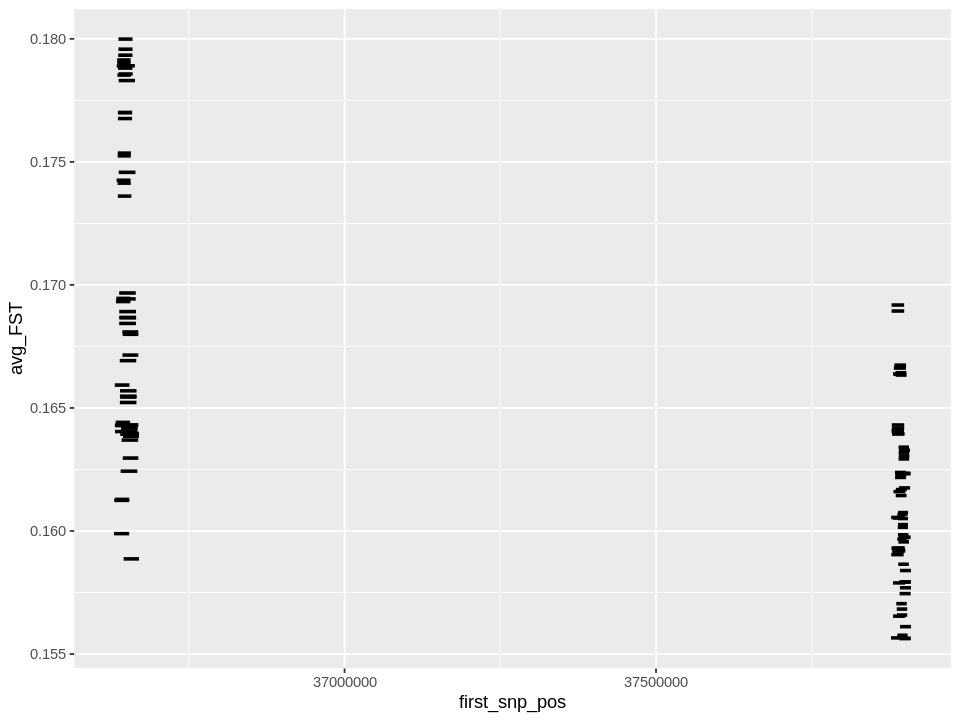

[1] 75


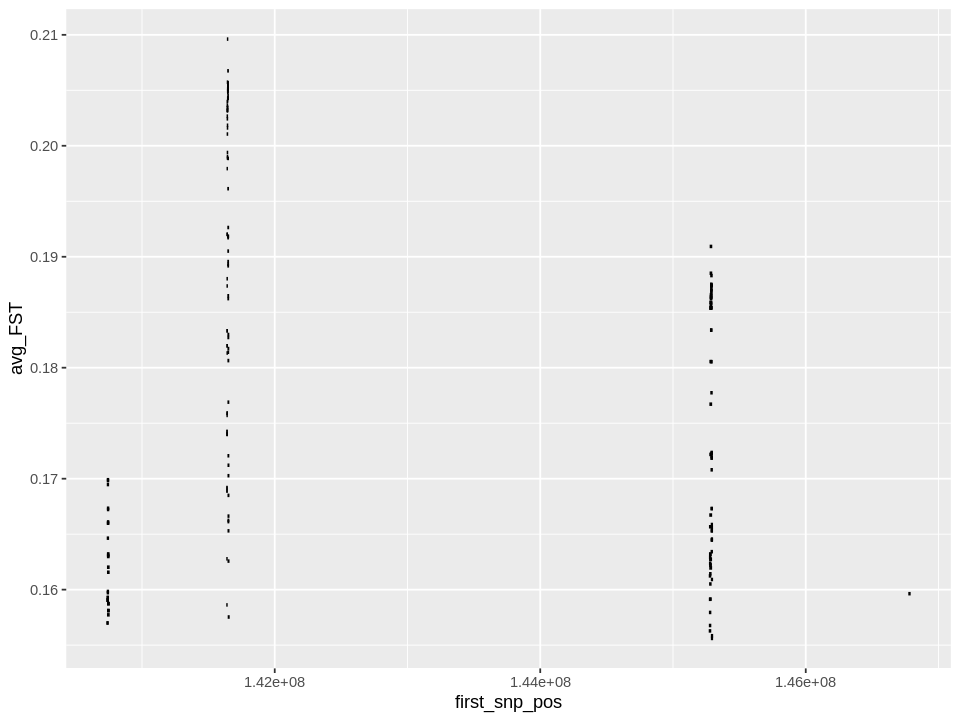

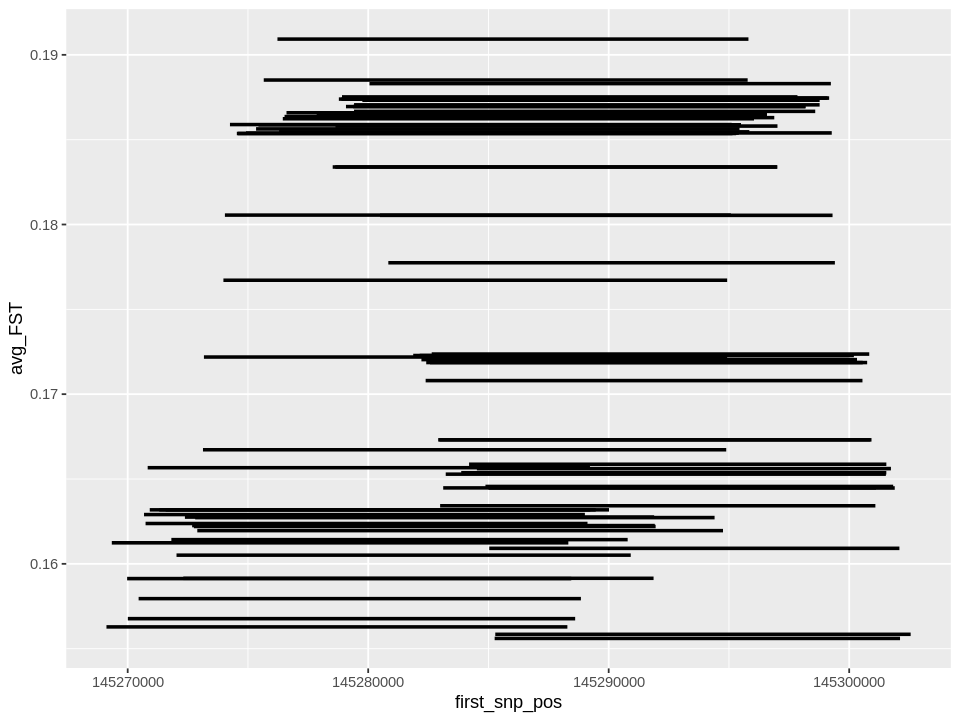

In [20]:
options(repr.plot.width=8, repr.plot.height=6)
# plotting the more clustered significant regions - to see if they are overlapping

FST_AF_WE_avg_in_window <- FST_AF_WE_averaged_in_sliding_window  %>% arrange(desc(avg_FST))
head(FST_AF_WE_avg_in_window)

# 1
FST_AF_WE_avg_in_window_high  <- FST_AF_WE_avg_in_window[1:500, ]  %>% filter(between(first_snp_pos, 3.5e+07, 4.0e+07))
n = nrow(FST_AF_WE_avg_in_window_high)
print(n)

ggplot(FST_AF_WE_avg_in_window_high) + geom_segment(aes(x = first_snp_pos, y = avg_FST, yend = avg_FST, xend = last_snp_pos), size = 1)

# 2
FST_AF_WE_avg_in_window_high  <- FST_AF_WE_avg_in_window[1:500, ]  %>% filter(between(first_snp_pos, 1.25e+08, 1.5e+08))
n = nrow(FST_AF_WE_avg_in_window_high)
print(n)

ggplot(FST_AF_WE_avg_in_window_high) + geom_segment(aes(x = first_snp_pos, y = avg_FST, yend = avg_FST, xend = last_snp_pos), size = 1)

# 14 regions in total

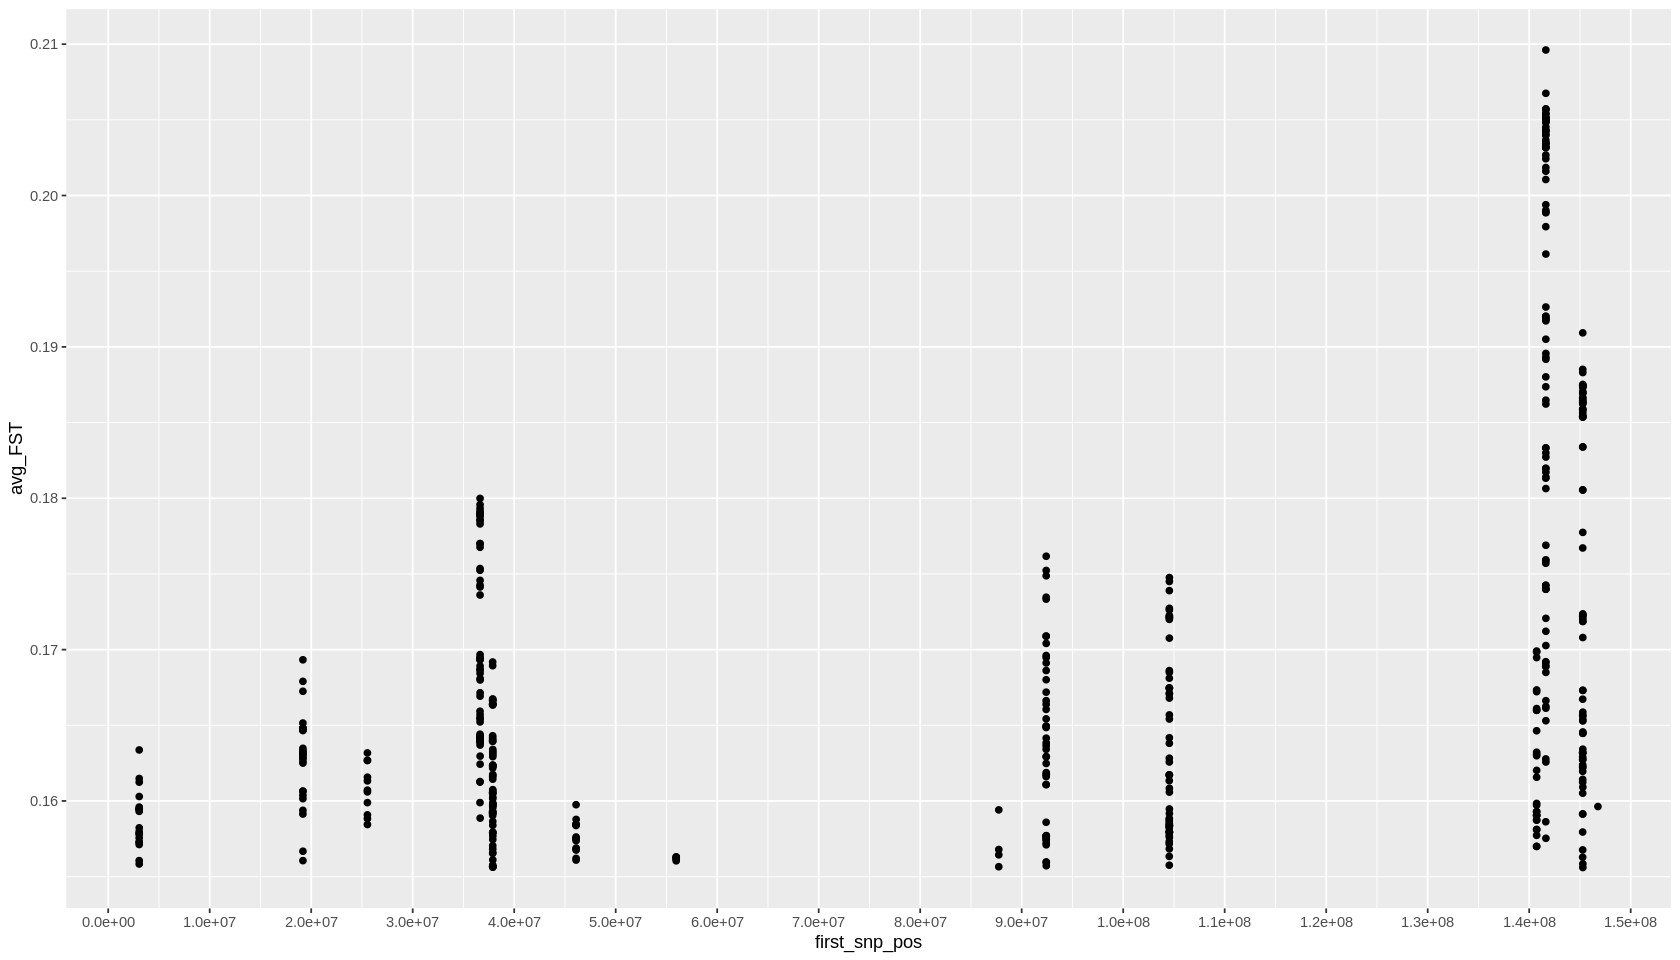

In [29]:
ggplot(FST_AF_WE_avg_in_window_high) + geom_point(aes(x = first_snp_pos, y = avg_FST)) + scale_x_continuous(breaks = seq(0, 1.5e+08, 1e+07))
# avg fst and geom point for this plot

### Get coordinates of the 14 regions

In [35]:
coord_1  <- get_coords(FST_AF_WE_avg_in_window[1:500, ]  
                   %>% filter(between(first_snp_pos, 0, 1e+07)))
print(coord_1)

coord_2  <- get_coords(FST_AF_WE_avg_in_window[1:500, ]  
                   %>% filter(between(first_snp_pos, 1e+07, 2e+07)))

print(coord_2)

coord_3  <- get_coords(FST_AF_WE_avg_in_window[1:500, ]  
                   %>% filter(between(first_snp_pos, 2e+07, 3e+07)))
print(coord_3)

coord_4  <- get_coords(FST_AF_WE_avg_in_window[1:500, ]  
                   %>% filter(between(first_snp_pos, 3e+07, 3.75e+07)))
print(coord_4)

coord_5  <- get_coords(FST_AF_WE_avg_in_window[1:500, ]  
                   %>% filter(between(first_snp_pos, 3.75e+07, 4e+07)))
print(coord_5)

coord_6  <- get_coords(FST_AF_WE_avg_in_window[1:500, ]  
                   %>% filter(between(first_snp_pos, 4e+07, 5e+07)))
print(coord_6)

coord_7  <- get_coords(FST_AF_WE_avg_in_window[1:500, ]  
                   %>% filter(between(first_snp_pos, 5e+07, 6e+07)))
print(coord_7)

coord_8  <- get_coords(FST_AF_WE_avg_in_window[1:500, ]  
                   %>% filter(between(first_snp_pos, 8e+07, 9e+07)))
print(coord_8)

coord_9  <- get_coords(FST_AF_WE_avg_in_window[1:500, ]  
                   %>% filter(between(first_snp_pos, 9e+07, 1e+08)))
print(coord_9)

coord_10  <- get_coords(FST_AF_WE_avg_in_window[1:500, ]  
                   %>% filter(between(first_snp_pos, 1e+08, 1.3e+08)))
print(coord_10)

coord_11  <- get_coords(FST_AF_WE_avg_in_window[1:500, ]  
                   %>% filter(between(first_snp_pos, 1.4e+08, 1.41e+08)))
print(coord_11)

coord_12  <- get_coords(FST_AF_WE_avg_in_window_high  <- FST_AF_WE_avg_in_window[1:500, ]  
                   %>% filter(between(first_snp_pos, 1.41e+08, 1.42e+08)))
print(coord_12)

coord_13  <- get_coords(FST_AF_WE_avg_in_window_high  <- FST_AF_WE_avg_in_window[1:500, ]  
                   %>% filter(between(first_snp_pos, 1.44e+08, 1.46e+08)))
print(coord_13)

coord_14  <- get_coords(FST_AF_WE_avg_in_window_high  <- FST_AF_WE_avg_in_window[1:500, ]  
                   %>% filter(between(first_snp_pos, 1.46e+08, 1.47e+08)))
print(coord_14)

[1] 3053023 3079168
[1] 19181354 19206720
[1] 25539228 25564843
[1] 36629985 36669987
[1] 37877271 37909396
[1] 46091974 46121996
[1] 55959575 55994904
[1] 87742035 87756743
[1] 92408854 92444012
[1] 104536647 104580440
[1] 140732445 140757264
[1] 141634780 141660732
[1] 145269117 145302556
[1] 146772483 146790262


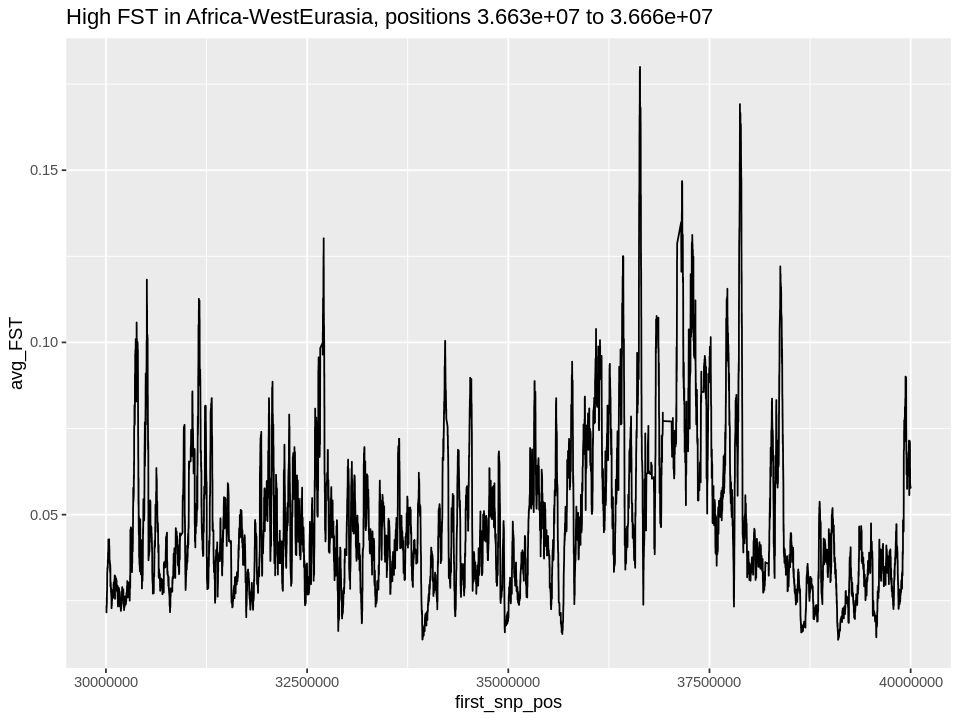

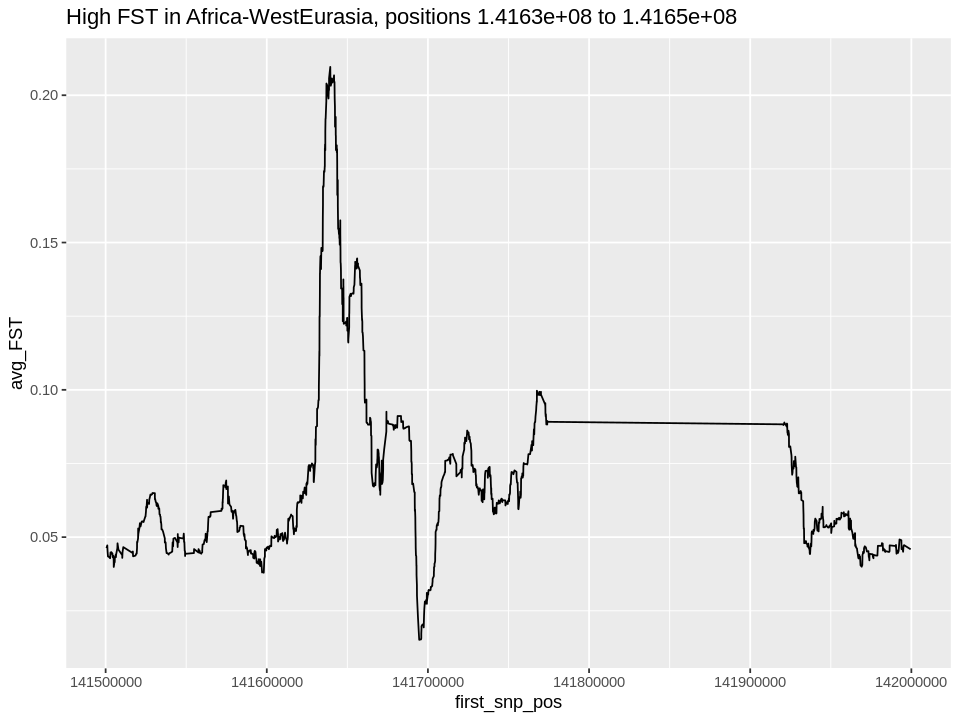

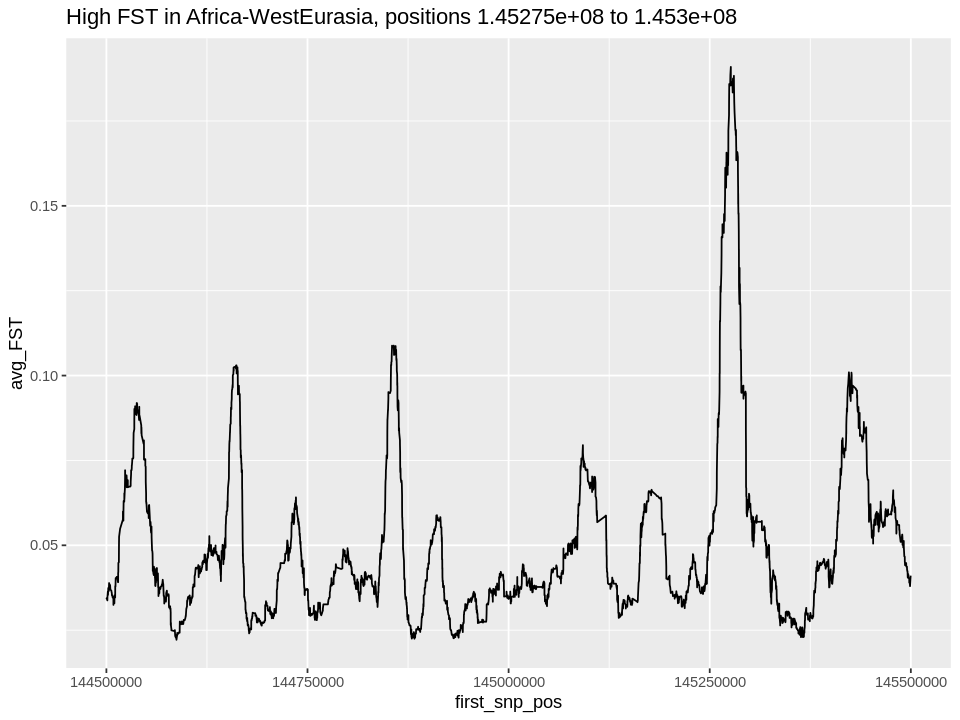

In [26]:
# FST in regions of significant FST Africa - WestEurasia
FST_AF_WE_avg_in_window  %>% 
    filter(between(first_snp_pos, 3.0e+07, 4.0e+07)) %>% 
    ggplot() + geom_line(aes(x = first_snp_pos, y = avg_FST)) + 
    ggtitle("High FST in Africa-WestEurasia, positions 3.663e+07 to 3.666e+07")

FST_AF_WE_avg_in_window  %>% 
    filter(between(first_snp_pos, 141500000, 142000000)) %>% 
    ggplot() + geom_line(aes(x = first_snp_pos, y = avg_FST)) +
    ggtitle("High FST in Africa-WestEurasia, positions 1.4163e+08 to 1.4165e+08")

FST_AF_WE_avg_in_window  %>% 
    filter(between(first_snp_pos, 144500000, 145500000)) %>% 
    ggplot() + geom_line(aes(x = first_snp_pos, y = avg_FST)) +
    ggtitle("High FST in Africa-WestEurasia, positions 1.45275e+08 to 1.453e+08")

### Visualization of significant regions,  WestEurasia-EastAsia

[1] 500


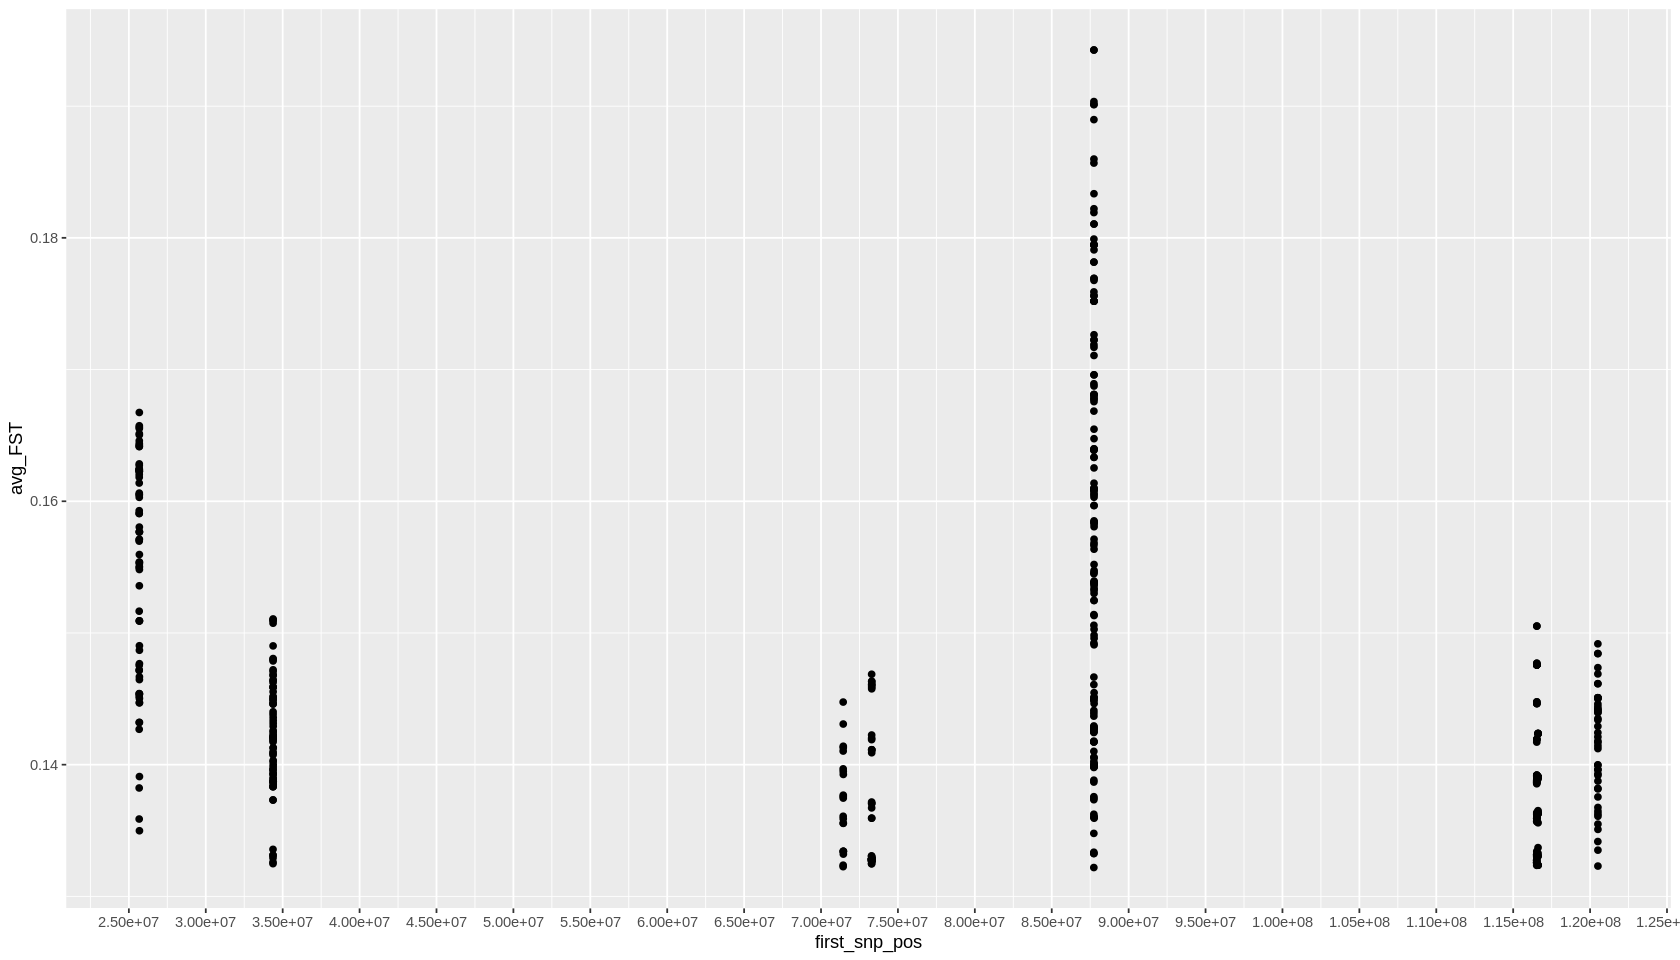

In [39]:
FST_WE_EA_avg_in_window  <- FST_WE_EA_averaged_in_sliding_window  %>% arrange(desc(avg_FST))

FST_WE_EA_avg_in_window_high  <- FST_WE_EA_avg_in_window[1:500, ]  
n = nrow(FST_WE_EA_avg_in_window_high)
print(n)

ggplot(FST_WE_EA_avg_in_window_high) + geom_point(aes(x = first_snp_pos, y = avg_FST)) + 
    scale_x_continuous(breaks = seq(0, 1.5e+08, 0.5e+07))

### Get coordinates of the significant regions

In [42]:
coord_1  <- get_coords(FST_WE_EA_avg_in_window[1:500, ]   %>% filter(between(first_snp_pos, 0, 3e+07)))
print(coord_1)

coord_2  <- get_coords(FST_WE_EA_avg_in_window[1:500, ]   %>% filter(between(first_snp_pos, 3e+07, 4e+07)))

print(coord_2)

coord_3  <- get_coords(FST_WE_EA_avg_in_window[1:500, ]   %>% filter(between(first_snp_pos, 7e+07, 7.25e+07)))
print(coord_3)

coord_4  <- get_coords(FST_WE_EA_avg_in_window[1:500, ]   %>% filter(between(first_snp_pos, 7.25e+07, 7.5e+07)))
print(coord_4)

coord_5  <- get_coords(FST_WE_EA_avg_in_window[1:500, ]   %>% filter(between(first_snp_pos, 8e+07, 9e+07)))
print(coord_5)

coord_6  <- get_coords(FST_WE_EA_avg_in_window[1:500, ]  %>% filter(between(first_snp_pos, 1.1e+08, 1.175e+08)))
print(coord_6)

coord_7  <- get_coords(FST_WE_EA_avg_in_window[1:500, ]   %>% filter(between(first_snp_pos, 1.175e+08, 1.25e+08)))
print(coord_7)

[1] 25670892 25705928
[1] 34369877 34404410
[1] 71437786 71491738
[1] 73284922 73338378
[1] 87736699 87769833
[1] 116528400 116637215
[1] 120503856 120524777


[1] 30
[1] 70


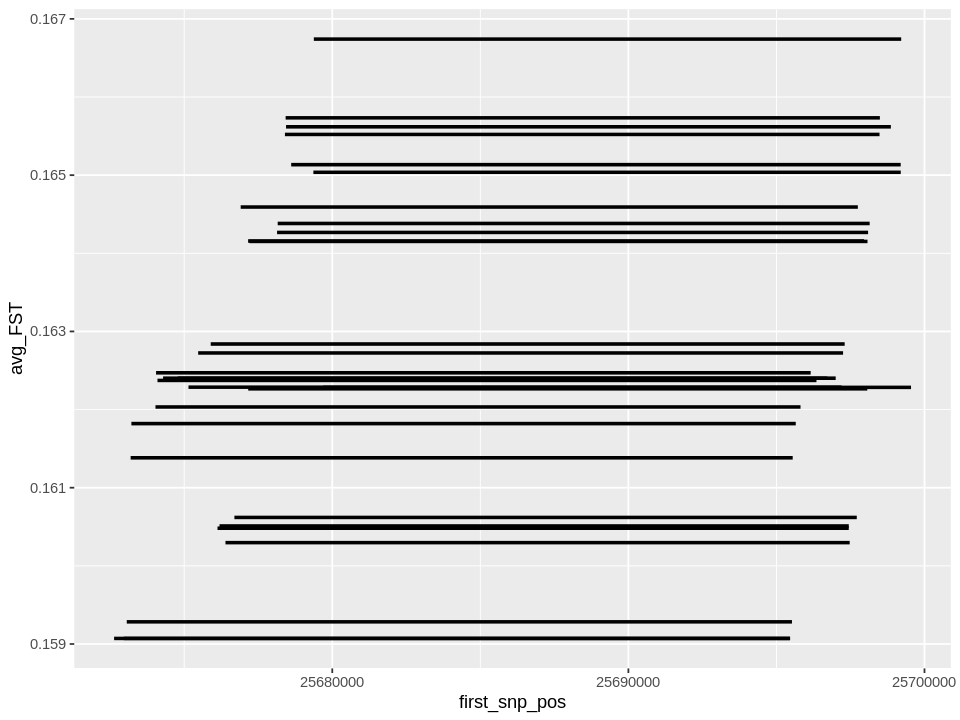

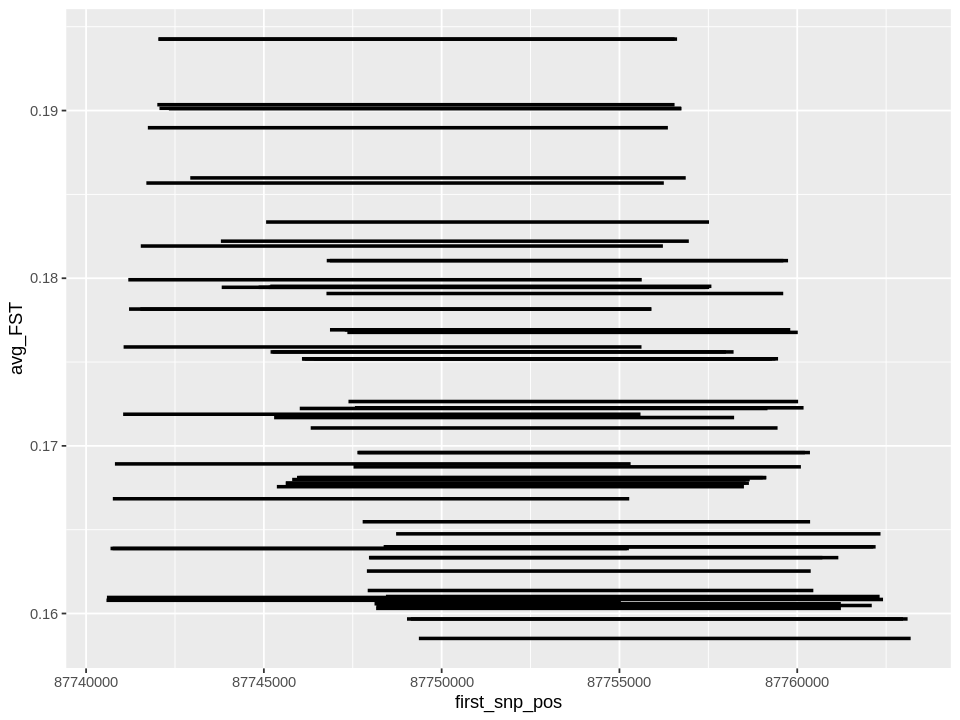

In [28]:
options(repr.plot.width=8, repr.plot.height=6)
# plotting the two significant regions

# 1
FST_WE_EA_avg_in_window_high  <- FST_WE_EA_avg_in_window[1:100, ]  %>% filter(between(first_snp_pos, 2e+07, 3e+07))
n = nrow(FST_WE_EA_avg_in_window_high)
print(n)

ggplot(FST_WE_EA_avg_in_window_high) + geom_segment(aes(x = first_snp_pos, y = avg_FST, yend = avg_FST, xend = last_snp_pos), size = 1)

# 2
FST_WE_EA_avg_in_window_high  <- FST_WE_EA_avg_in_window[1:100, ]  %>% filter(between(first_snp_pos, 8e+07, 9e+07))
n = nrow(FST_WE_EA_avg_in_window_high)
print(n)

ggplot(FST_WE_EA_avg_in_window_high) + geom_segment(aes(x = first_snp_pos, y = avg_FST, yend = avg_FST, xend = last_snp_pos), size = 1)


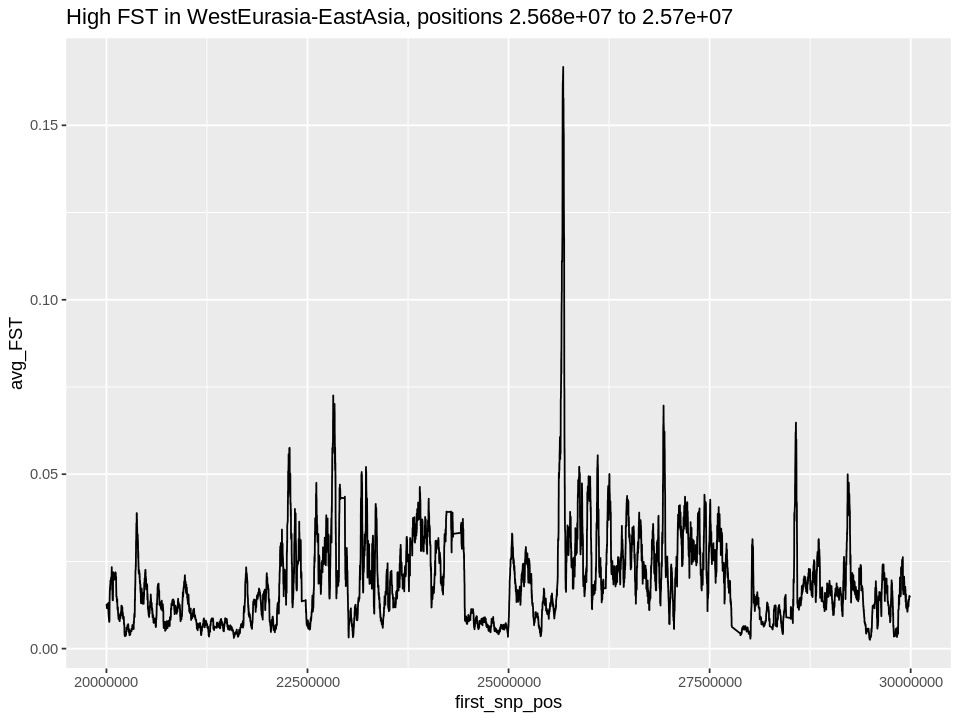

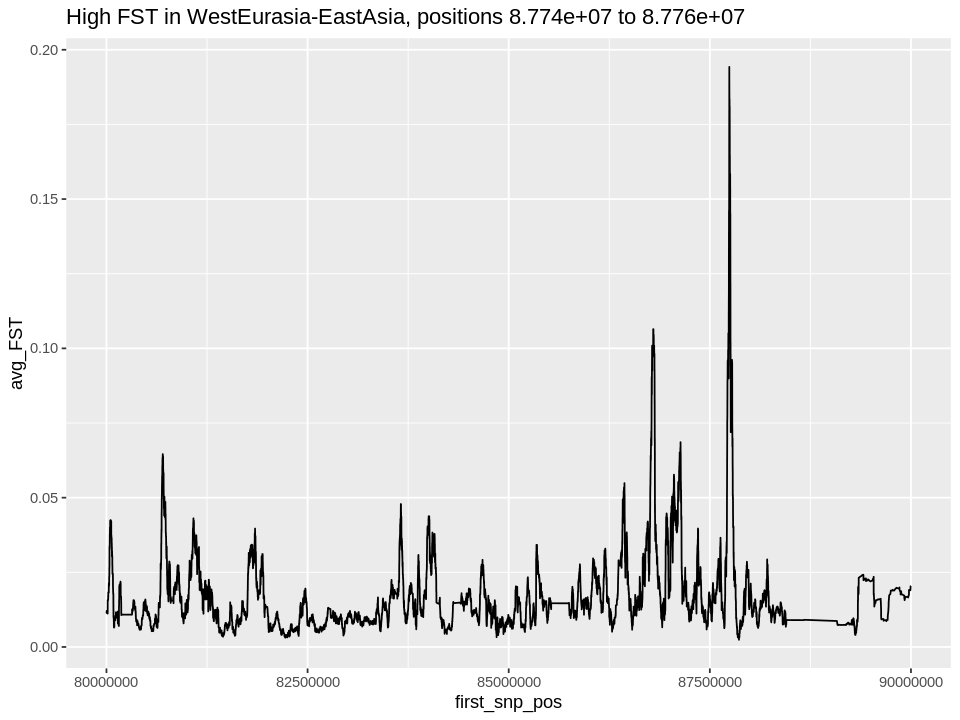

In [29]:
FST_WE_EA_avg_in_window  %>% 
    filter(between(first_snp_pos, 2e+07, 3e+07)) %>% 
    ggplot() + geom_line(aes(x = first_snp_pos, y = avg_FST)) + 
    ggtitle("High FST in WestEurasia-EastAsia, positions 2.568e+07 to 2.57e+07")

FST_WE_EA_avg_in_window  %>% 
    filter(between(first_snp_pos, 8e+07, 9e+07)) %>% 
    ggplot() + geom_line(aes(x = first_snp_pos, y = avg_FST)) +
    ggtitle("High FST in WestEurasia-EastAsia, positions 8.774e+07 to 8.776e+07")


### Visualization of significant regions,  Africa-EastAsia

,chr,first_snp_pos,last_snp_pos,avg_FST
,<chr>,<int>,<int>,<dbl>
1,X,90574931,90599747,0.3075771
2,X,90576998,90599753,0.3073332
3,X,90574684,90599622,0.3040935
4,X,90577453,90600023,0.3021815
5,X,90577681,90600277,0.2981373
6,X,90574677,90599574,0.2960431


[1] 500


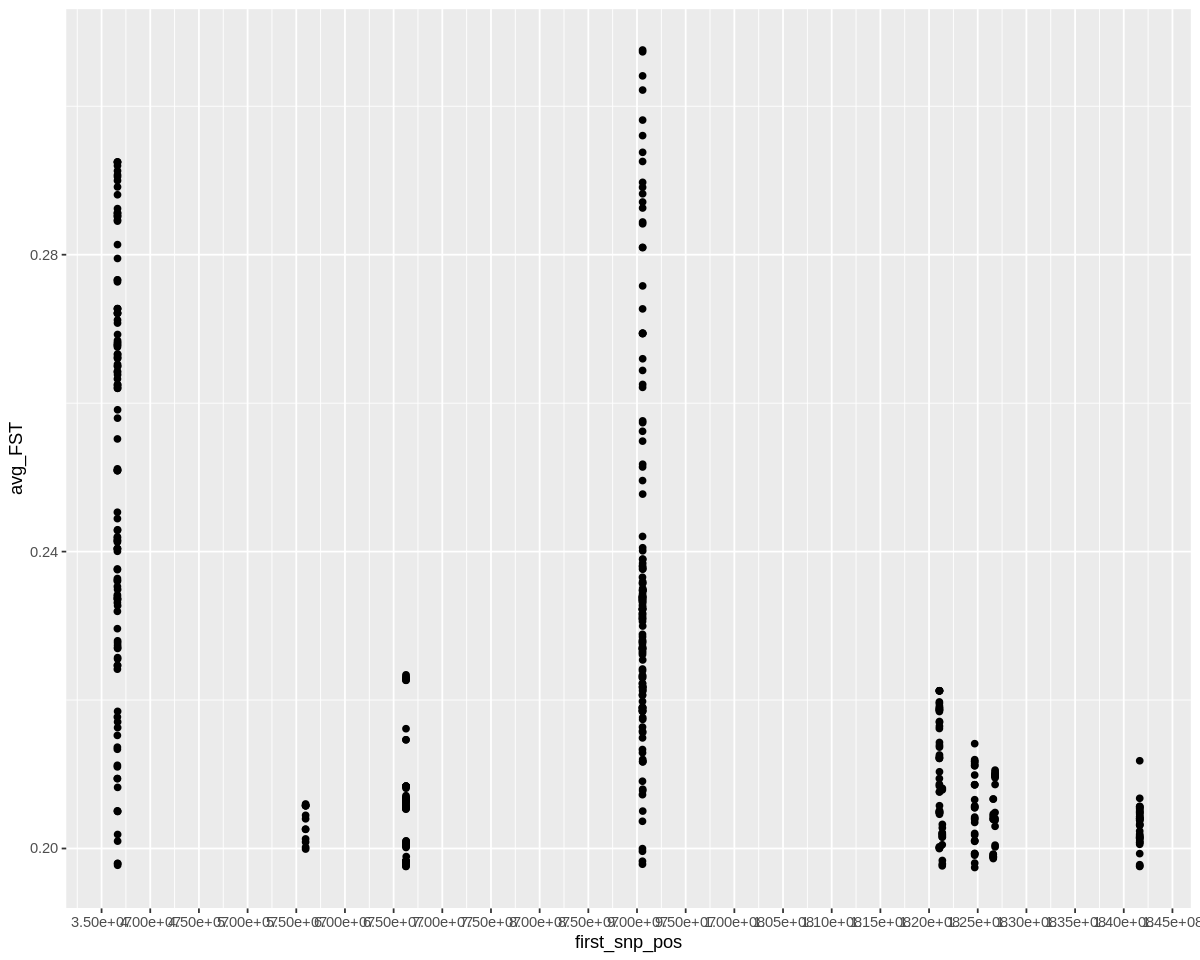

In [45]:
options(repr.plot.width=10, repr.plot.height=8)
# identify 10 strongest Fst outliers in each three (possibly more) cases

FST_EA_AF_avg_in_window <- FST_EA_AF_averaged_in_sliding_window %>% arrange(desc(avg_FST))
head(FST_EA_AF_avg_in_window)

FST_EA_AF_avg_in_window_high  <- FST_EA_AF_avg_in_window[1:500, ]  
n = nrow(FST_EA_AF_avg_in_window_high)
print(n)

ggplot(FST_EA_AF_avg_in_window_high) + geom_point(aes(x = first_snp_pos, y = avg_FST)) +
    scale_x_continuous(breaks = seq(0, 1.5e+08, 0.5e+07))
# avg fst and geom point for this plot

,chr,first_snp_pos,last_snp_pos,avg_FST,region
,<chr>,<int>,<int>,<dbl>,<chr>
1,X,90574931,90599747,0.3075771,Africa - EastAsia
2,X,90576998,90599753,0.3073332,Africa - EastAsia
3,X,90574684,90599622,0.3040935,Africa - EastAsia
4,X,90577453,90600023,0.3021815,Africa - EastAsia
5,X,90577681,90600277,0.2981373,Africa - EastAsia
6,X,90574677,90599574,0.2960431,Africa - EastAsia


[1] 65
[1] 35


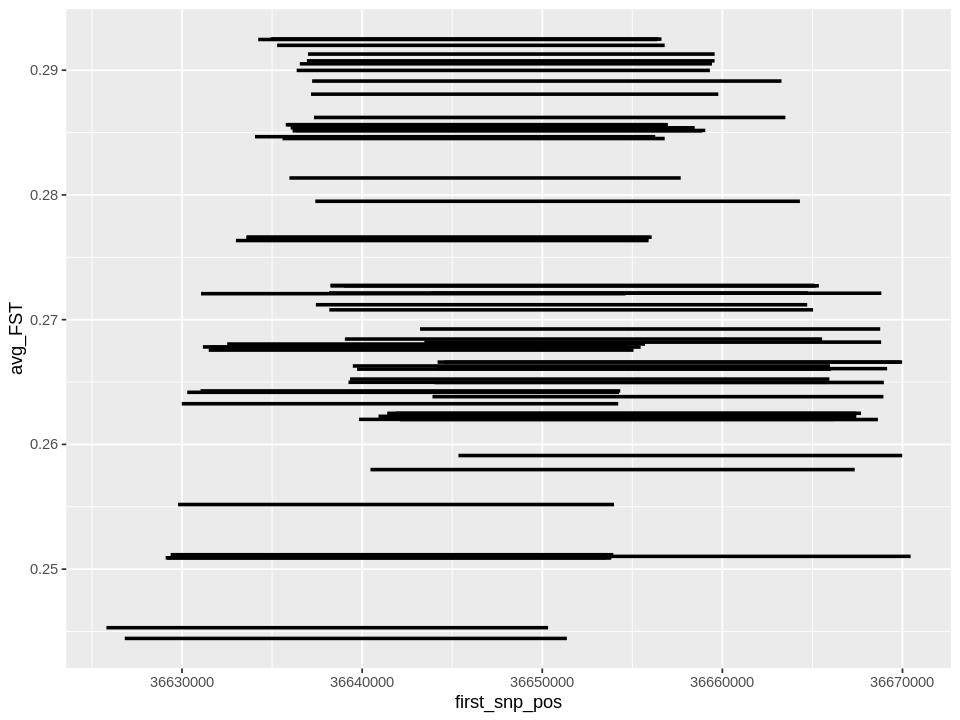

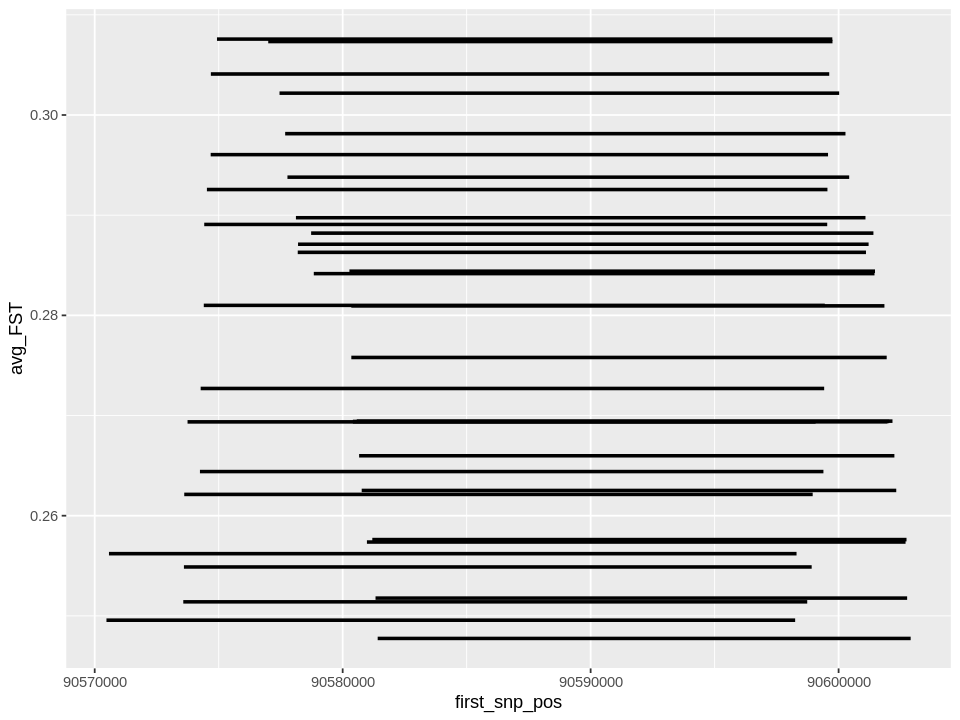

In [31]:
options(repr.plot.width=8, repr.plot.height=6)
# plotting the two significant regions

FST_EA_AF_avg_in_window <- FST_EA_AF_averaged_in_sliding_window  %>% arrange(desc(avg_FST))
head(FST_EA_AF_avg_in_window)

# 1
FST_EA_AF_avg_in_window_high  <- FST_EA_AF_avg_in_window[1:100, ]  %>% filter(between(first_snp_pos, 3.5e+07, 4e+07))
n = nrow(FST_EA_AF_avg_in_window_high)
print(n)

ggplot(FST_EA_AF_avg_in_window_high) + geom_segment(aes(x = first_snp_pos, y = avg_FST, yend = avg_FST, xend = last_snp_pos), size = 1)

# 2
FST_EA_AF_avg_in_window_high  <- FST_EA_AF_avg_in_window[1:100, ]  %>% filter(between(first_snp_pos, 8.5e+07, 9.5e+07))
n = nrow(FST_EA_AF_avg_in_window_high)
print(n)

ggplot(FST_EA_AF_avg_in_window_high) + geom_segment(aes(x = first_snp_pos, y = avg_FST, yend = avg_FST, xend = last_snp_pos), size = 1)



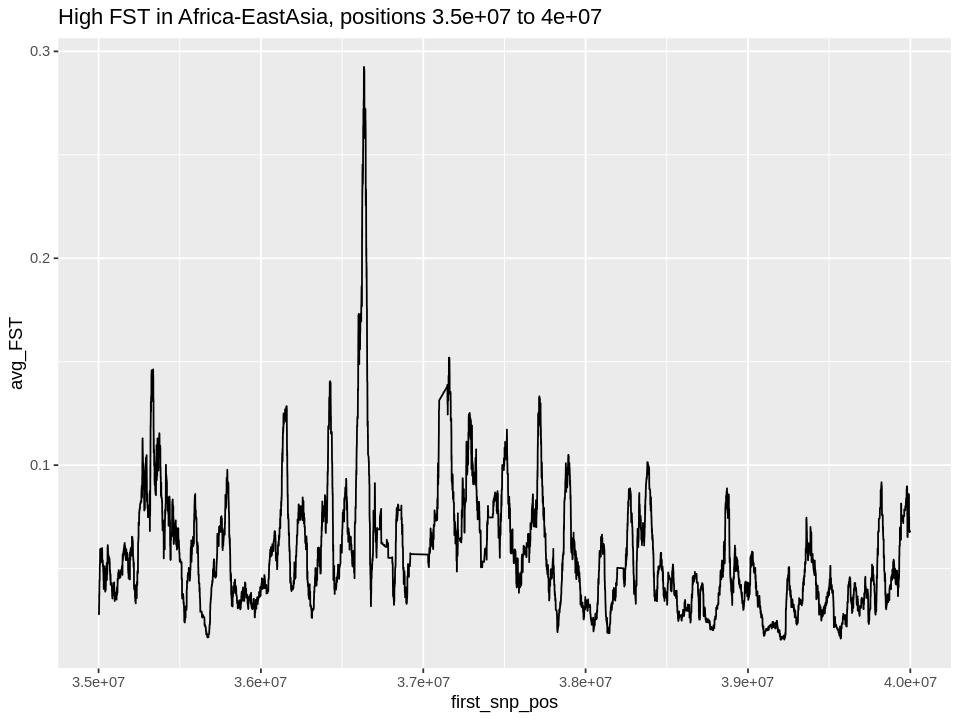

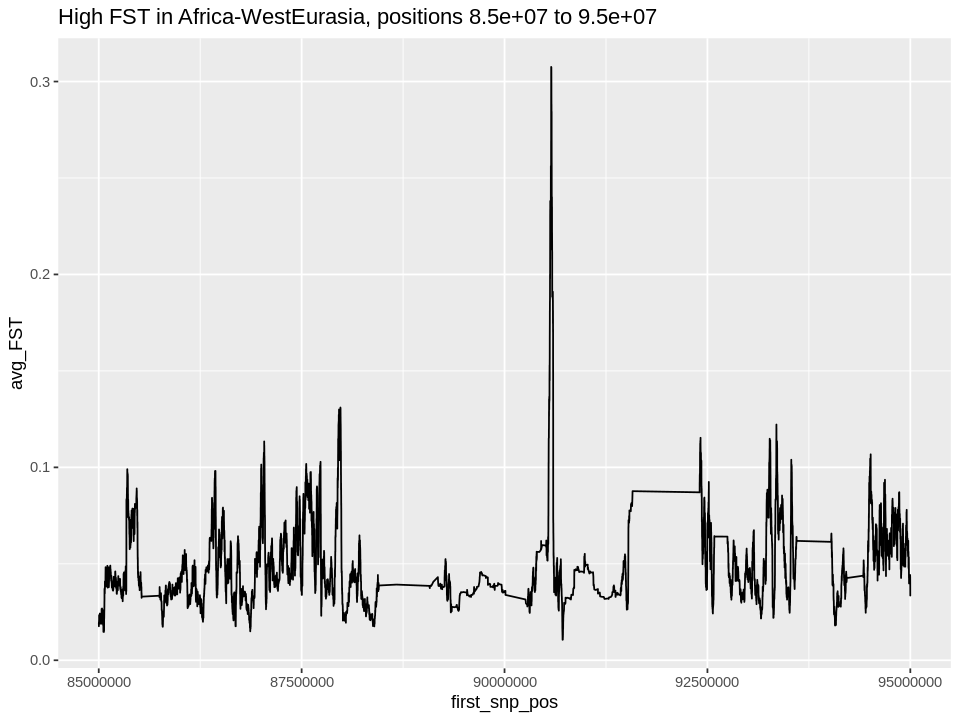

In [32]:

# FST in regions of significant FST Africa-EastAsia
FST_EA_AF_avg_in_window  %>% 
    filter(between(first_snp_pos, 3.5e+07, 4e+07)) %>% 
    ggplot() + geom_line(aes(x = first_snp_pos, y = avg_FST)) + 
    ggtitle("High FST in Africa-EastAsia, positions 3.5e+07 to 4e+07")

FST_EA_AF_avg_in_window  %>% 
    filter(between(first_snp_pos, 8.5e+07, 9.5e+07)) %>% 
    ggplot() + geom_line(aes(x = first_snp_pos, y = avg_FST)) +
    ggtitle("High FST in Africa-WestEurasia, positions 8.5e+07 to 9.5e+07")


### Get coordinates of the significant regions

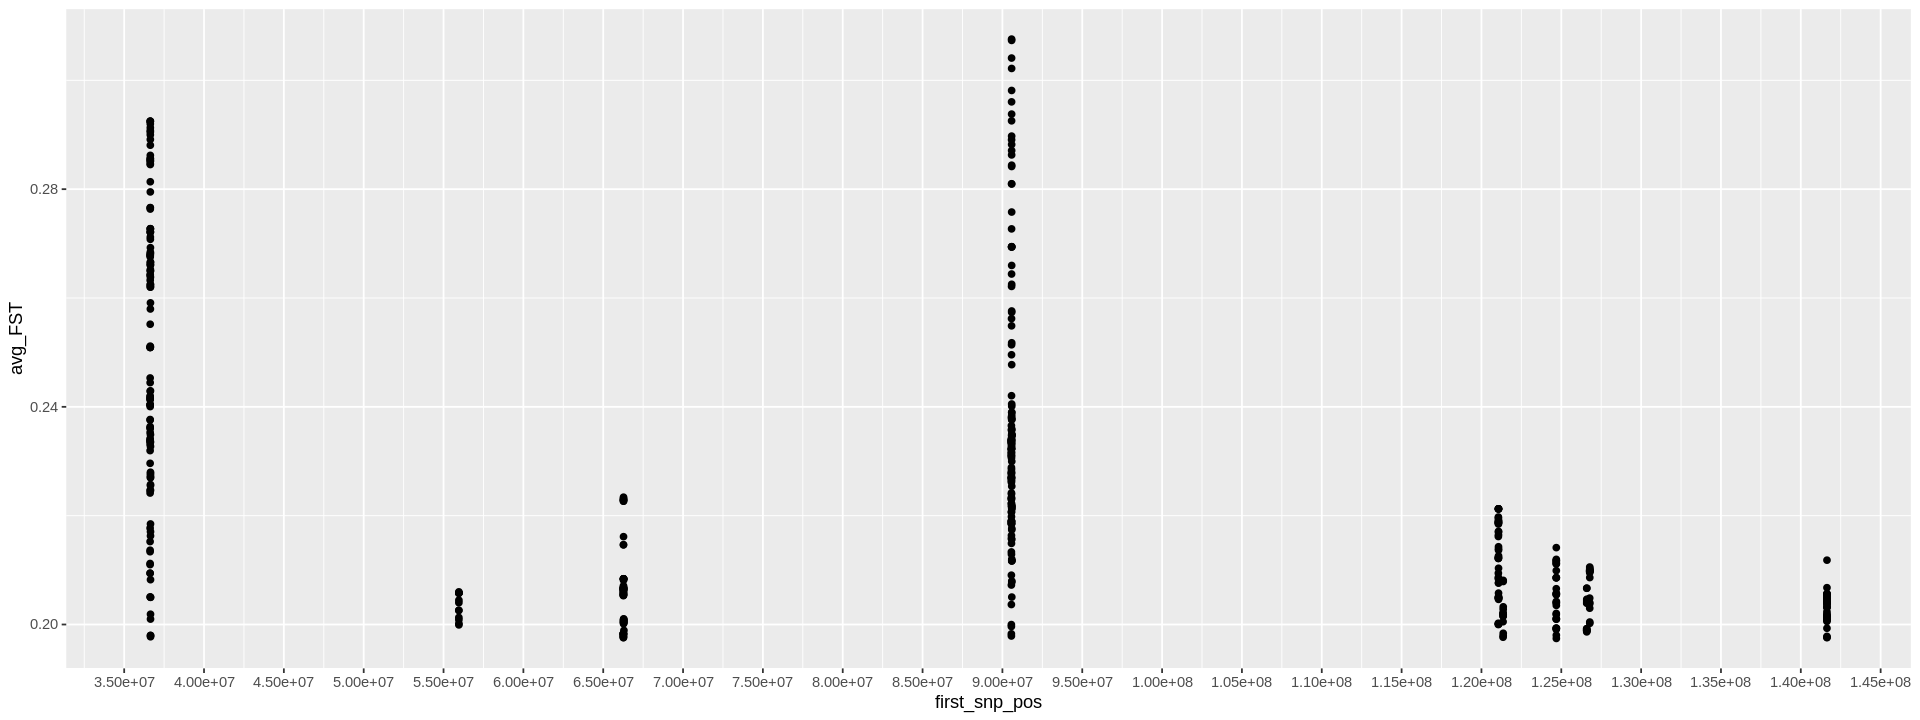

In [48]:
options(repr.plot.width=16, repr.plot.height=6)
ggplot(FST_EA_AF_avg_in_window_high) + geom_point(aes(x = first_snp_pos, y = avg_FST)) +
    scale_x_continuous(breaks = seq(0, 1.5e+08, 0.5e+07))

In [50]:
coord_1  <- get_coords(FST_EA_AF_avg_in_window[1:500, ]  
                   %>% filter(between(first_snp_pos, 0, 4e+07)))
print(coord_1)

coord_2  <- get_coords(FST_EA_AF_avg_in_window[1:500, ]  
                   %>% filter(between(first_snp_pos, 5e+07, 6e+07)))

print(coord_2)

coord_3  <- get_coords(FST_EA_AF_avg_in_window[1:500, ]  
                   %>% filter(between(first_snp_pos, 6e+07, 7e+07)))
print(coord_3)

coord_4  <- get_coords(FST_EA_AF_avg_in_window[1:500, ]  
                   %>% filter(between(first_snp_pos, 8e+07, 1e+08)))
print(coord_4)

coord_5  <- get_coords(FST_EA_AF_avg_in_window[1:500, ]  
                   %>% filter(between(first_snp_pos, 1.2e+08, 1.225e+08)))
print(coord_5)

coord_6  <- get_coords(FST_EA_AF_avg_in_window[1:500, ]  
                   %>% filter(between(first_snp_pos, 1.225e+08, 1.26e+08)))
print(coord_6)

coord_7  <- get_coords(FST_EA_AF_avg_in_window[1:500, ]  
                   %>% filter(between(first_snp_pos, 1.26e+08, 1.3e+08)))
print(coord_7)

coord_8  <- get_coords(FST_EA_AF_avg_in_window[1:500, ]  
                   %>% filter(between(first_snp_pos, 1.4e+08, 1.45e+08)))
print(coord_8)

[1] 36622769 36674703
[1] 55956294 55995332
[1] 66263466 66318768
[1] 90560431 90608023
[1] 121057258 121382391
[1] 124683074 124727725
[1] 126590699 126814898
[1] 141637024 141655132


## 500 SNPs is approximately 0.12% of the whole data

In [ ]:
nrow(FST_AF_WE_avg_in_window)
nrow(FST_EA_AF_avg_in_window)
nrow(FST_WE_EA_avg_in_window)

#411793 - 100%
#x - 5%

x = (411793*0.12)/100
print(x)

### Saving the 500 most significant FST values for annotating

In [51]:
options(repr.plot.width=14, repr.plot.height=10)

# Africa -  WestEurasia
FST_AF_WE_avg_in_window <- FST_AF_WE_averaged_in_sliding_window  %>% arrange(desc(avg_FST))
nrow(FST_AF_WE_avg_in_window)
FST_AF_WE_avg_in_window_high  <- FST_AF_WE_avg_in_window[1:500, ]
nrow(FST_AF_WE_avg_in_window_high)
FST_AF_WE_window_high500_bed <- FST_AF_WE_avg_in_window_high  %>% 
                                mutate(chr = rep("chrX", nrow(FST_AF_WE_avg_in_window_high)))  %>%  
                                select(chr, first_snp_pos, last_snp_pos, avg_FST)
write_delim(FST_AF_WE_window_high500_bed, "FST_AF_WE_window_high500.bed", delim = "\t", col_names = FALSE)


# WestEurasia -EastAsia
FST_WE_EA_avg_in_window  <- FST_WE_EA_averaged_in_sliding_window  %>% arrange(desc(avg_FST))
FST_WE_EA_avg_in_window_high  <- FST_WE_EA_avg_in_window[1:500, ]  
FST_WE_EA_window_high500_bed <- FST_WE_EA_avg_in_window_high  %>% 
                                mutate(chr = rep("chrX", nrow(FST_WE_EA_avg_in_window_high)))  %>%  
                                select(chr, first_snp_pos, last_snp_pos, avg_FST)
write_delim(FST_WE_EA_window_high500_bed, "FST_WE_EA_window_high500.bed", delim = "\t", col_names = FALSE)

# Africa - EastAsia
FST_EA_AF_avg_in_window  <- FST_EA_AF_averaged_in_sliding_window  %>% arrange(desc(avg_FST))

FST_EA_AF_avg_in_window_high  <- FST_EA_AF_avg_in_window[1:500, ]  
tail(FST_EA_AF_avg_in_window_high)
FST_EA_AF_window_high500_bed <- FST_EA_AF_avg_in_window_high  %>% 
                                mutate(chr = rep("chrX", nrow(FST_EA_AF_avg_in_window_high)))  %>%  
                                select(chr, first_snp_pos, last_snp_pos, avg_FST)
write_delim(FST_EA_AF_window_high500_bed, "FST_EA_AF_window_high500.bed", delim = "\t", col_names = FALSE)
dim(FST_EA_AF_window_high500_bed)




[1] 411793

[1] 500

,chr,first_snp_pos,last_snp_pos,avg_FST
,<chr>,<int>,<int>,<dbl>
495,X,121354242,121378920,0.1976599
496,X,141638173,141649793,0.1976413
497,X,66265814,66296363,0.1976076
498,X,66265238,66293466,0.1975765
499,X,141638284,141649802,0.1975761
500,X,124690621,124727725,0.1974347


[1] 500   4

### Combining the three population sets high FST regions in summarising plot

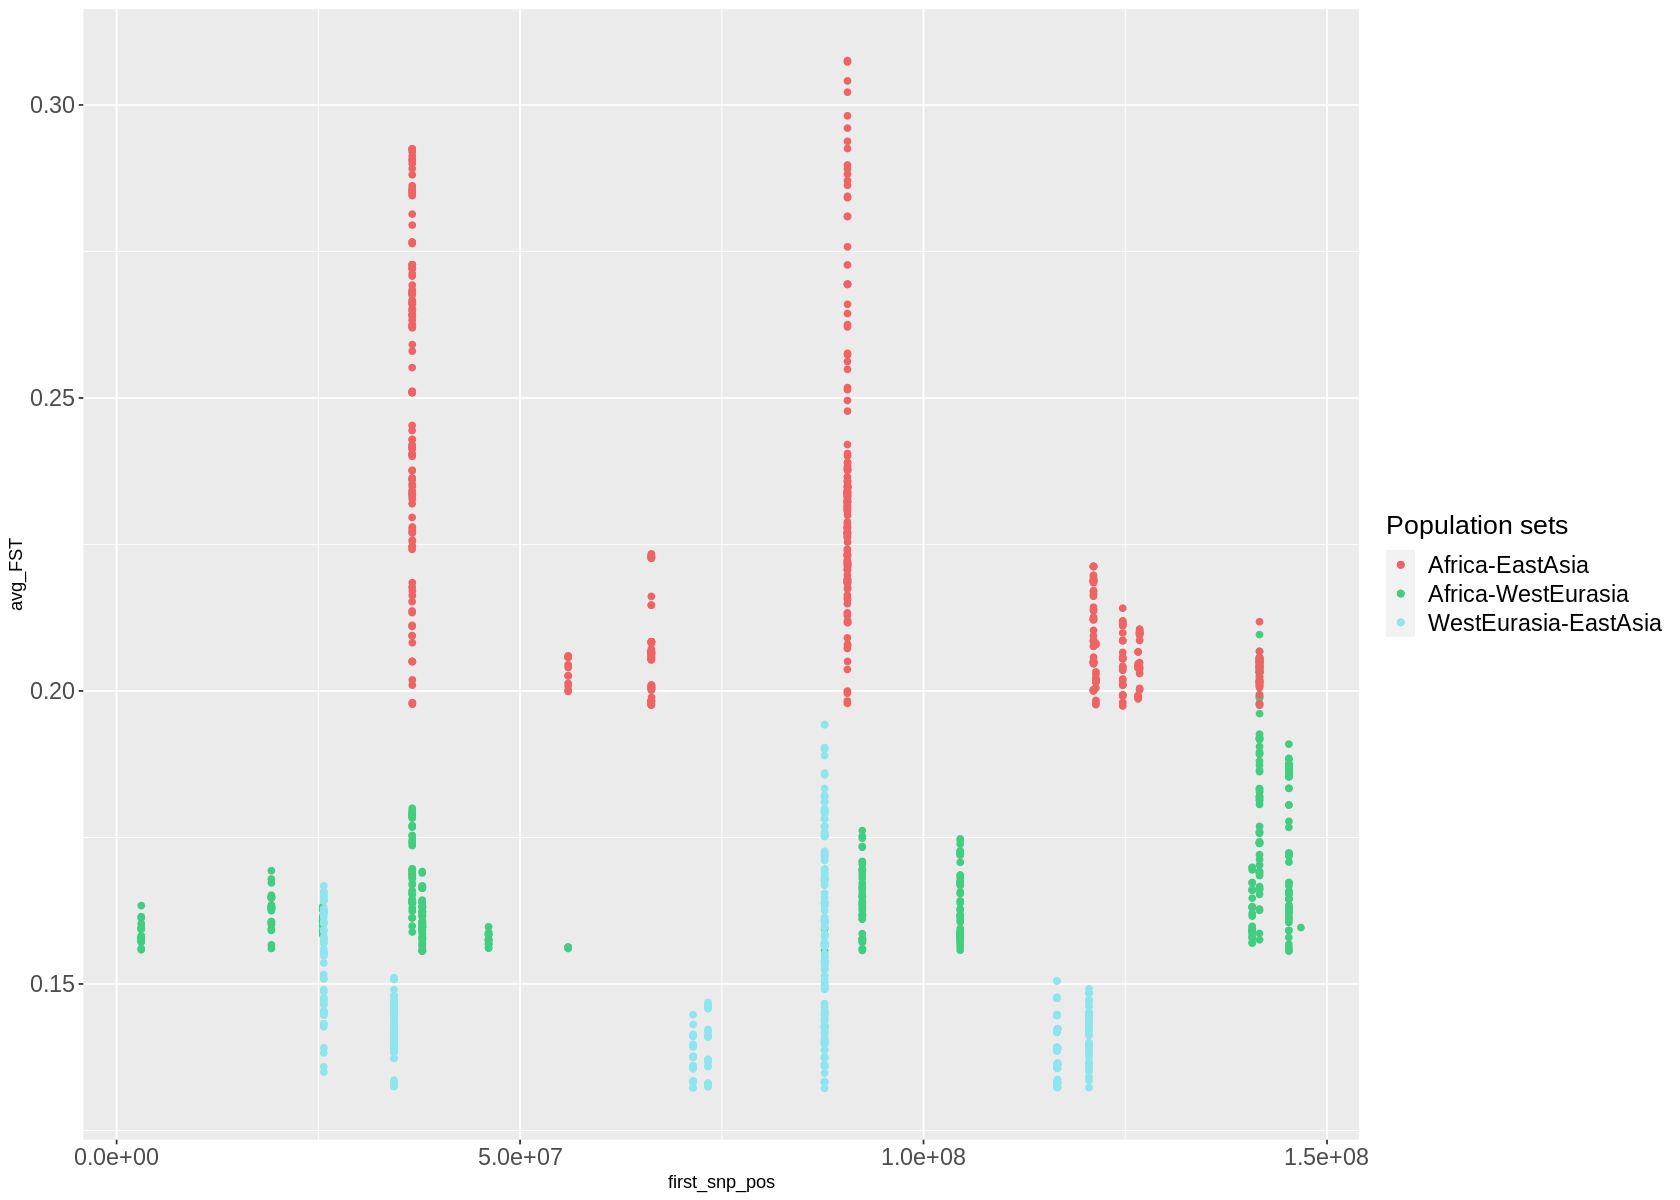

In [14]:
colors <- c("Africa-WestEurasia" = "seagreen3", "WestEurasia-EastAsia" = "cadetblue2", "Africa-EastAsia" = "indianred2")

ggplot() + geom_point(data = FST_AF_WE_avg_in_window_high, aes(x = first_snp_pos, y = avg_FST, color = "Africa-WestEurasia")) + 
        geom_point(data = FST_WE_EA_avg_in_window_high, aes(x = first_snp_pos, y = avg_FST, color = "WestEurasia-EastAsia")) + 
        geom_point(data = FST_EA_AF_avg_in_window_high, aes(x = first_snp_pos, y = avg_FST, color = "Africa-EastAsia")) + 
        labs(color = "Population sets") + 
        scale_color_manual(values = colors) + 
    theme(
        legend.title = element_text(size = 16),
        legend.text = element_text(size = 14), 
        axis.text.x = element_text(size = 14), 
        axis.text.y = element_text(size = 14)
        )


FST_AF_WE_avg_in_window_high <- FST_AF_WE_avg_in_window_high %>% 
    mutate(region = rep("Africa - WestEurasia", nrow(FST_AF_WE_avg_in_window_high)), data = rep("significant"), nrow(FST_AF_WE_avg_in_window_high))
FST_WE_EA_avg_in_window_high <- FST_WE_EA_avg_in_window_high %>% 
    mutate(region = rep("WestEurasia - EastAsia", nrow(FST_WE_EA_avg_in_window_high)), data = rep("significant"), nrow(FST_WE_EA_avg_in_window_high))
FST_EA_AF_avg_in_window_high <- FST_EA_AF_avg_in_window_high  %>% 
    mutate(region = rep("Africa - EastAsia", nrow(FST_EA_AF_avg_in_window_high)), data = rep("significant"), nrow(FST_EA_AF_avg_in_window_high))

FST_3S_avg_in_window_high <- bind_rows(FST_AF_WE_avg_in_window_high, FST_WE_EA_avg_in_window_high, FST_EA_AF_avg_in_window_high)

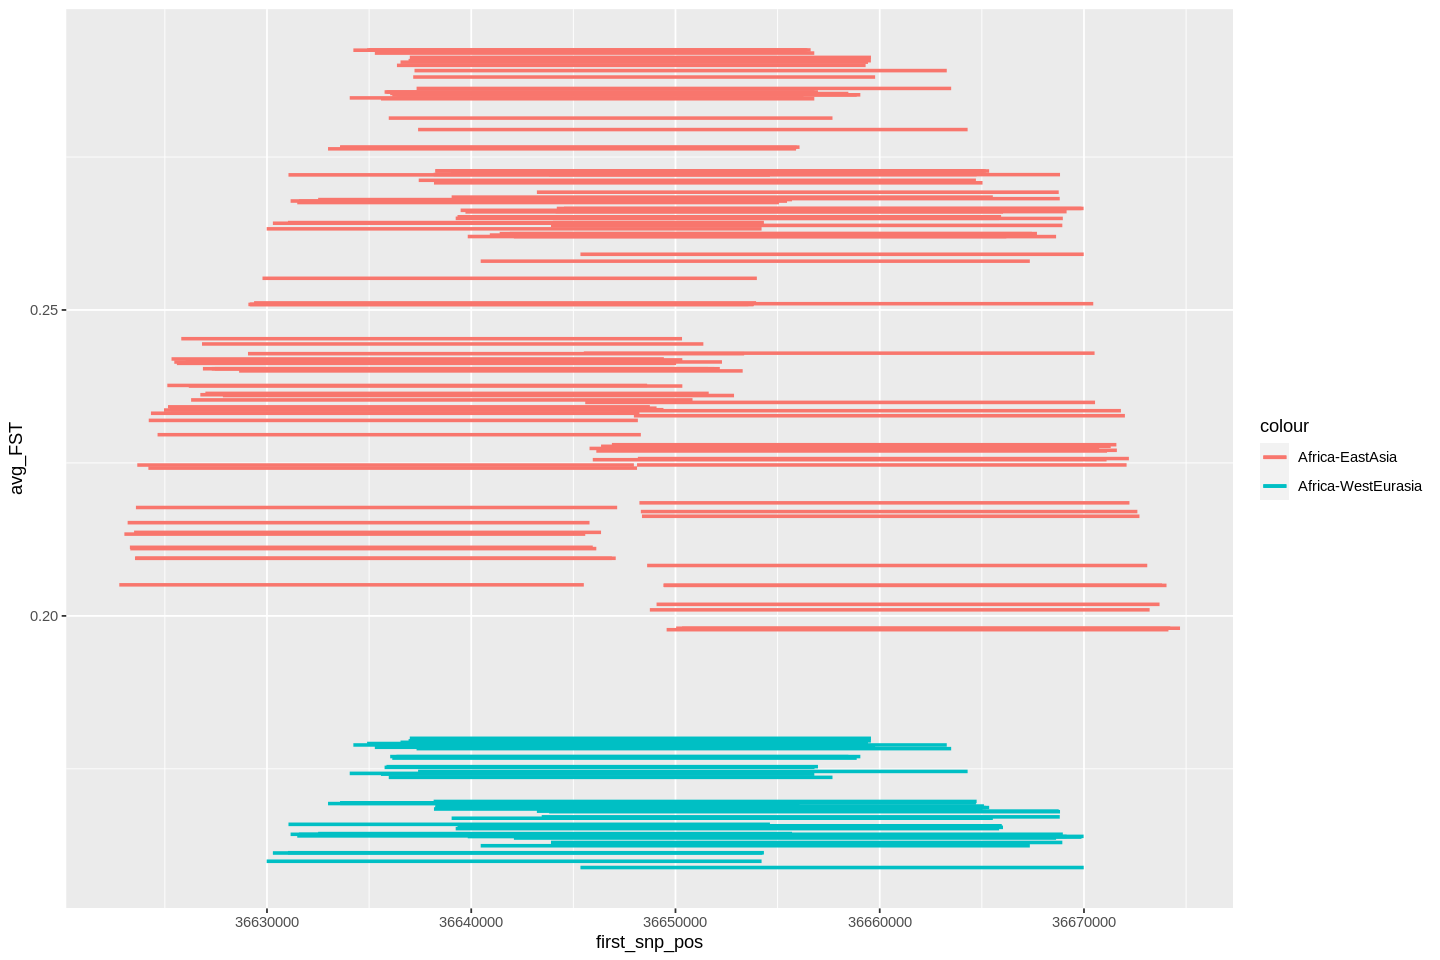

In [35]:
options(repr.plot.width=12, repr.plot.height=8)
# plotting the two significant regions

# 1
FST_AF_WE_avg_in_window_high  <- FST_AF_WE_avg_in_window[1:500, ]  %>% filter(between(first_snp_pos, 3.5e+07, 3.75e+07))
#FST_WE_EA_avg_in_window_high  <- FST_WE_EA_avg_in_window[1:500, ]  %>% filter(between(first_snp_pos, 3.5e+07, 3.75e+07))
FST_EA_AF_avg_in_window_high  <- FST_EA_AF_avg_in_window[1:500, ]  %>% filter(between(first_snp_pos, 3.5e+07, 3.75e+07))

ggplot() + 
    geom_segment(data = FST_AF_WE_avg_in_window_high, aes(x = first_snp_pos, y = avg_FST, yend = avg_FST, xend = last_snp_pos, color = "Africa-WestEurasia"), size = 1) +
   # geom_segment(data = FST_WE_EA_avg_in_window_high, aes(x = first_snp_pos, y = avg_FST, yend = avg_FST, xend = last_snp_pos, color = "WestEurasia-EastAsia"), size = 1) + 
    geom_segment(data = FST_EA_AF_avg_in_window_high, aes(x = first_snp_pos, y = avg_FST, yend = avg_FST, xend = last_snp_pos, color = "Africa-EastAsia"), size = 1)


# 2
# FST_EA_AF_avg_in_window_high  <- FST_EA_AF_avg_in_window[1:100, ]  %>% filter(between(first_snp_pos, 8.5e+07, 9.5e+07))

# ggplot(FST_EA_AF_avg_in_window_high) + geom_segment(aes(x = first_snp_pos, y = avg_FST, yend = avg_FST, xend = last_snp_pos), size = 1)


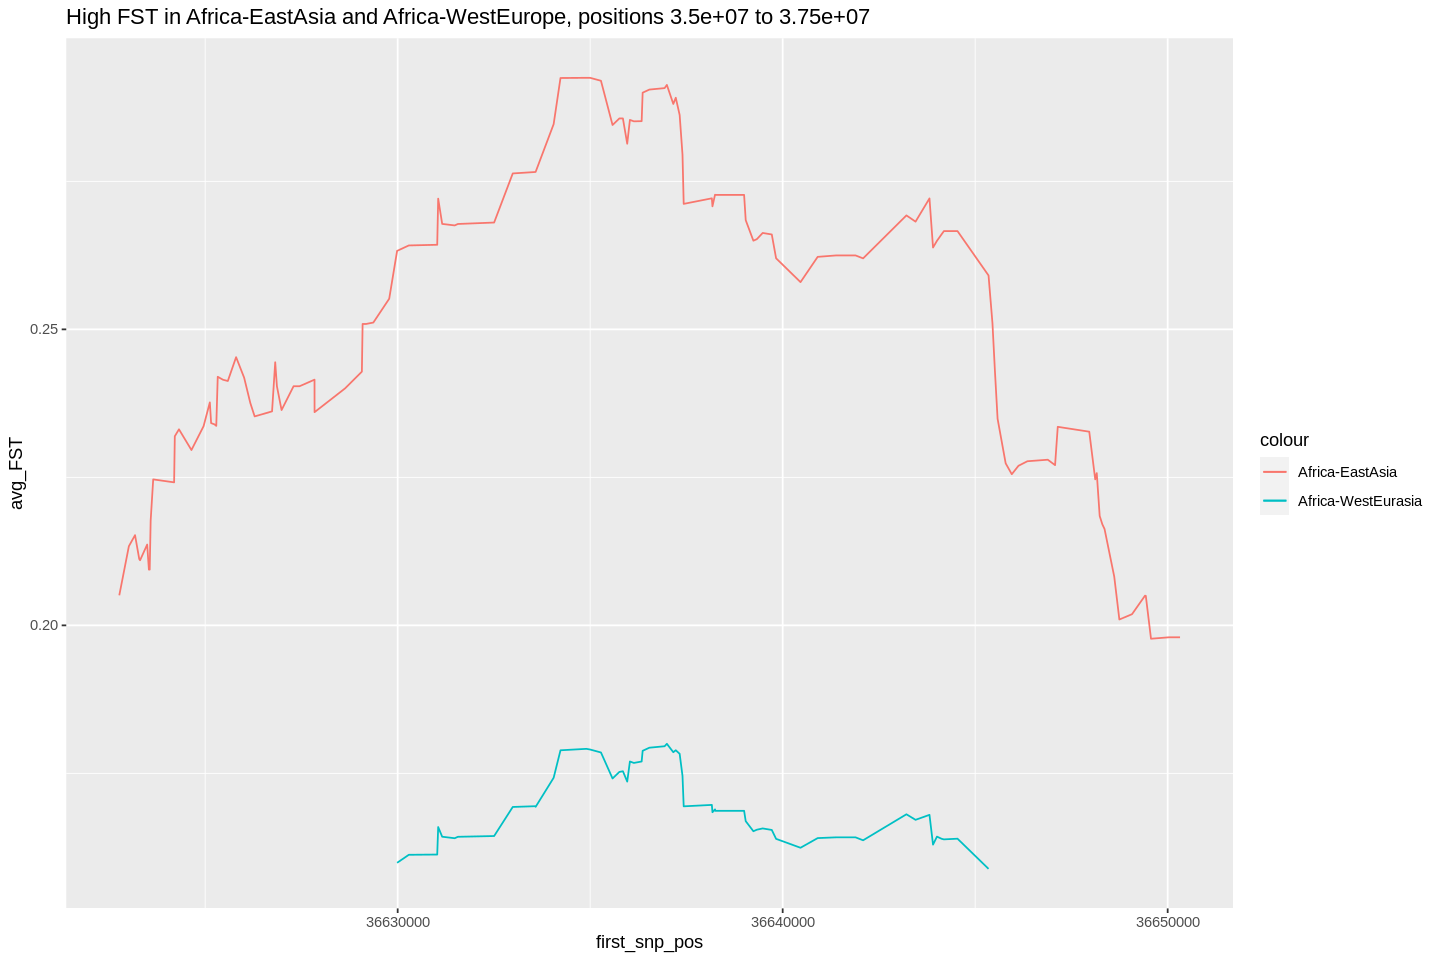

In [36]:
ggplot() + geom_line(data = FST_AF_WE_avg_in_window_high, aes(x = first_snp_pos, y = avg_FST, color = "Africa-WestEurasia")) + 
    geom_line(data = FST_EA_AF_avg_in_window_high, aes(x = first_snp_pos, y = avg_FST, color = "Africa-EastAsia")) + 
    ggtitle("High FST in Africa-EastAsia and Africa-WestEurope, positions 3.5e+07 to 3.75e+07")


## Annotating genes in the siginficant regions,  Africa -  WestEurasia

[1] 346


[1] 252

,chr1,start1,end1,avg_FST,chr2,start2,end2,gene_id,overlap
,<chr>,<int>,<int>,<dbl>,<chr>,<int>,<int>,<chr>,<int>
1,chrX,104551933,104578307,0.1747591,chrX,103810995,105011822,ENSG00000189108.12_3,26374
2,chrX,104552956,104578330,0.1745030,chrX,103810995,105011822,ENSG00000189108.12_3,25374
3,chrX,104549101,104575152,0.1738967,chrX,103810995,105011822,ENSG00000189108.12_3,26051
4,chrX,104548422,104574589,0.1727301,chrX,103810995,105011822,ENSG00000189108.12_3,26167
5,chrX,104548287,104574421,0.1726151,chrX,103810995,105011822,ENSG00000189108.12_3,26134
6,chrX,104548952,104574633,0.1722301,chrX,103810995,105011822,ENSG00000189108.12_3,25681


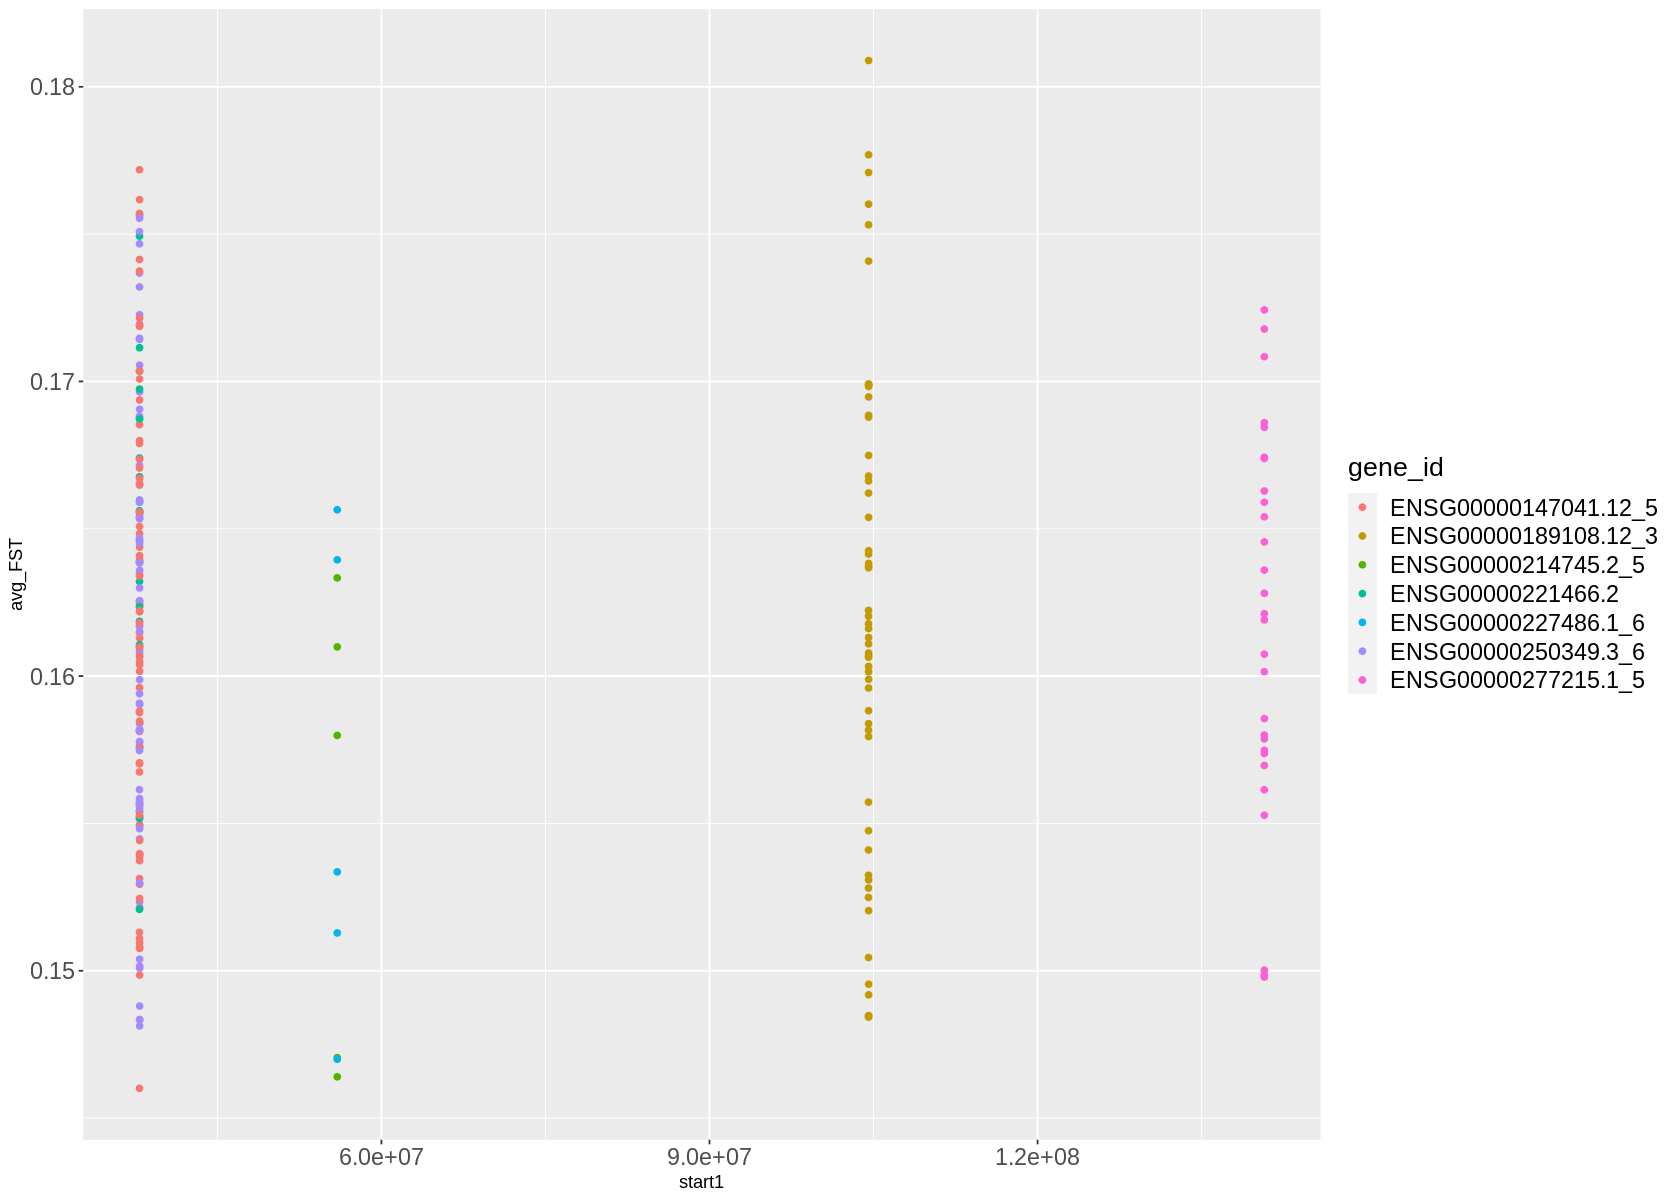

In [74]:
options(repr.plot.width=14, repr.plot.height=10)

FST_AF_WE_500_genes <- read.table("FST_AF_WE_high_500_genes.bed", header = FALSE, sep = '\t')
colnames(FST_AF_WE_500_genes)  <- c("chr1", "start1", "end1", "avg_FST", "chr2", "start2", "end2", "gene_id", "overlap")

print(nrow(FST_AF_WE_500_genes  %>% filter(overlap == 0)))

FST_AF_WE_500_genes  <- FST_AF_WE_500_genes %>% filter(overlap != 0)  %>% 
    distinct_at(vars(chr1, start1, end1, gene_id), .keep_all = TRUE)
nrow(FST_AF_WE_500_genes)
head(FST_AF_WE_500_genes)

ggplot() + geom_jitter(data = FST_AF_WE_500_genes, aes(x = start1, y = avg_FST, color = gene_id), width = 0.001, height = 0.01) +
    theme(
        legend.title = element_text(size = 16),
        legend.text = element_text(size = 14), 
        axis.text.x = element_text(size = 14), 
        axis.text.y = element_text(size = 14)
        )


gene_names_AF_WE_FST  <- (unique(FST_AF_WE_500_genes[c("gene_id")]))

write_delim(gene_names_AF_WE_FST , "gene_names_AF_WE_FST.csv", delim = "\t", col_names = TRUE)

In [65]:
gene_names_AF_WE_FST

min((FST_AF_WE_500_genes  %>% filter(gene_id == "ENSG00000189108.12_3")  %>% select(start1))[[1]])

min((FST_AF_WE_500_genes  %>% filter(gene_id == "ENSG00000277215.1_5")%>% select(start1))[[1]])

min((FST_AF_WE_500_genes  %>% filter(gene_id == "ENSG00000147041.12_5") %>% select(start1))[[1]])

min((FST_AF_WE_500_genes  %>% filter(gene_id == "ENSG00000221466.2") %>% select(start1))[[1]])

min((FST_AF_WE_500_genes  %>% filter(gene_id == "ENSG00000250349.3_6") %>% select(start1))[[1]])

min((FST_AF_WE_500_genes  %>% filter(gene_id == "ENSG00000214745.2_5") %>% select(start1))[[1]])

min((FST_AF_WE_500_genes  %>% filter(gene_id == "ENSG00000227486.1_6") %>% select(start1))[[1]])

,gene_id
,<chr>
1,ENSG00000189108.12_3
12,ENSG00000277215.1_5
15,ENSG00000147041.12_5
16,ENSG00000221466.2
17,ENSG00000250349.3_6
229,ENSG00000214745.2_5
230,ENSG00000227486.1_6


[1] 104536647

[1] 140732445

[1] 37877271

[1] 37877271

[1] 37877271

[1] 55959575

[1] 55959575

## Annotating genes in the siginficant regions,  Africa -  EastAsia

[1] 643   9

[1] 417


[1] 110

               gene_id
1  ENSG00000206062.4_5
19 ENSG00000260683.1_5
31 ENSG00000280142.1_5
34 ENSG00000274631.1_5
38 ENSG00000214745.2_5
39 ENSG00000227486.1_6


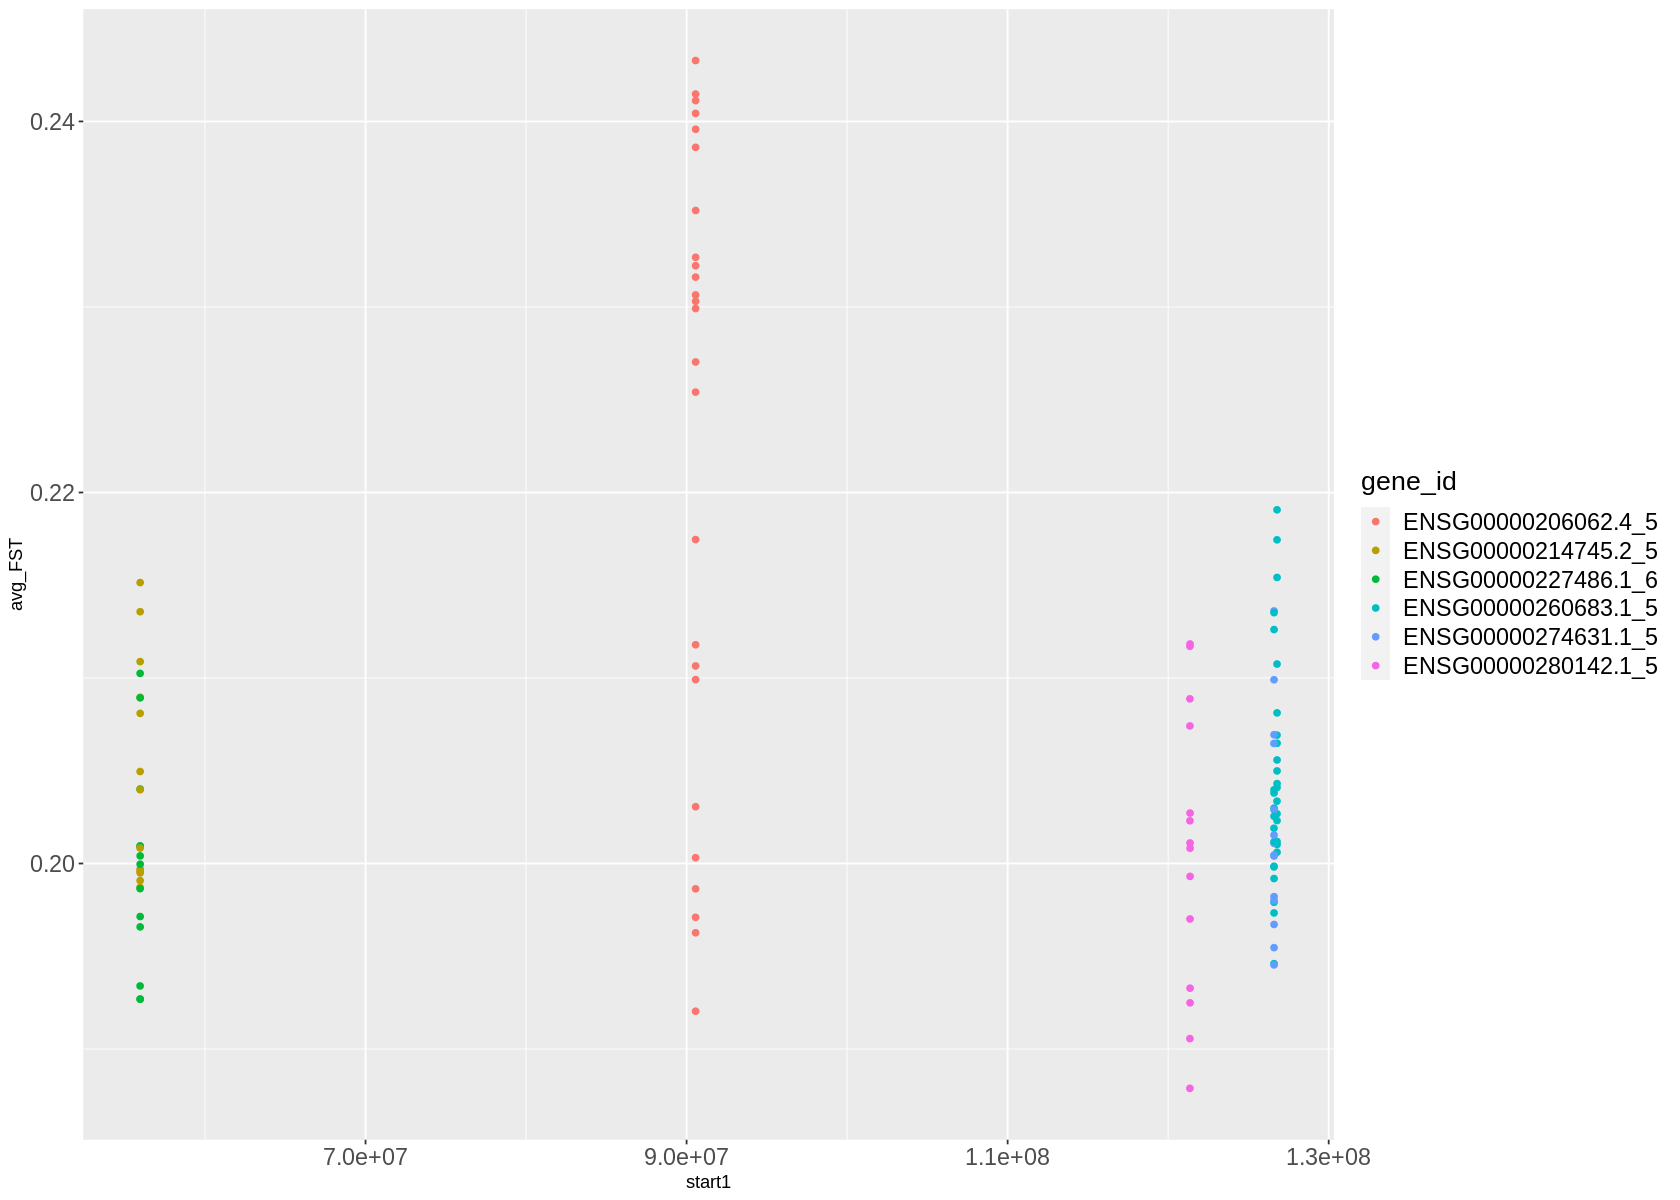

In [75]:
options(repr.plot.width=14, repr.plot.height=10)

FST_EA_AF_500_genes <- read.table("FST_EA_AF_high_500_genes.bed", header = FALSE, sep = '\t')
dim(FST_EA_AF_500_genes)

colnames(FST_EA_AF_500_genes)  <- c("chr1", "start1", "end1", "avg_FST", "chr2", "start2", "end2", "gene_id", "overlap")

print(nrow(FST_EA_AF_500_genes  %>% filter(overlap == 0)))

FST_EA_AF_500_genes  <- FST_EA_AF_500_genes %>% filter(overlap != 0)  %>% 
    distinct_at(vars(chr1, start1, end1, gene_id), .keep_all = TRUE)
nrow(FST_EA_AF_500_genes)

ggplot() + geom_jitter(data = FST_EA_AF_500_genes, aes(x = start1, y = avg_FST, color = gene_id), width = 0.001, height = 0.01) +
    theme(
        legend.title = element_text(size = 16),
        legend.text = element_text(size = 14), 
        axis.text.x = element_text(size = 14), 
        axis.text.y = element_text(size = 14)
        )

gene_names_EA_AF_FST <- (unique(FST_EA_AF_500_genes[c("gene_id")]))
print(gene_names_EA_AF_FST)

write_delim(gene_names_EA_AF_FST, "gene_names_EA_AF_FST.csv", delim = "\t", col_names = TRUE)

In [68]:

min((FST_EA_AF_500_genes  %>% filter(gene_id == "ENSG00000206062.4_5") %>% select(start1))[[1]])

min((FST_EA_AF_500_genes  %>% filter(gene_id == "ENSG00000260683.1_5")%>% select(start1))[[1]])

min((FST_EA_AF_500_genes %>% filter(gene_id == "ENSG00000280142.1_5") %>% select(start1))[[1]])

min((FST_EA_AF_500_genes %>% filter(gene_id == "ENSG00000274631.1_5") %>% select(start1))[[1]])

min((FST_EA_AF_500_genes %>% filter(gene_id == "ENSG00000214745.2_5") %>% select(start1))[[1]])

min((FST_EA_AF_500_genes %>% filter(gene_id == "ENSG00000227486.1_6") %>% select(start1))[[1]])

[1] 90560431

[1] 126590699

[1] 121354242

[1] 126590699

[1] 55956294

[1] 55956294

## Annotating genes in the siginficant regions,  WestEurasia -  EastAsia

[1] 331


[1] 300

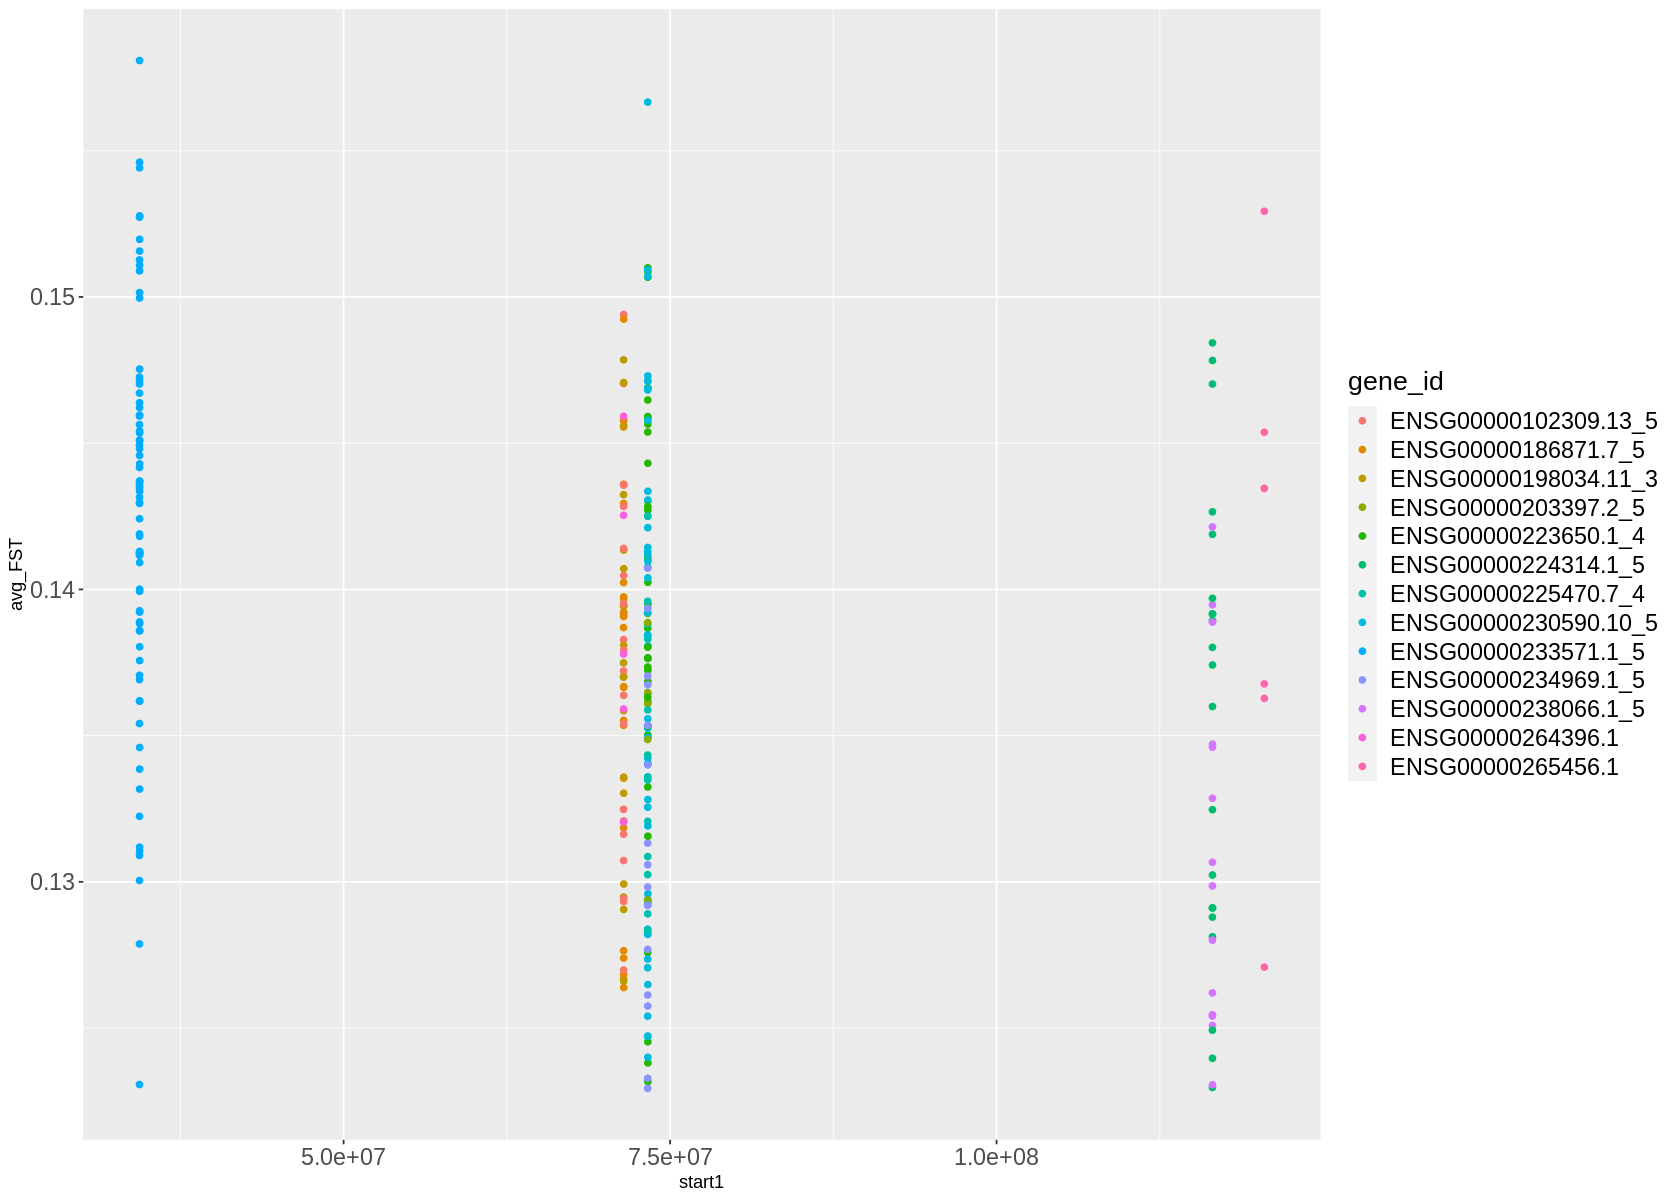

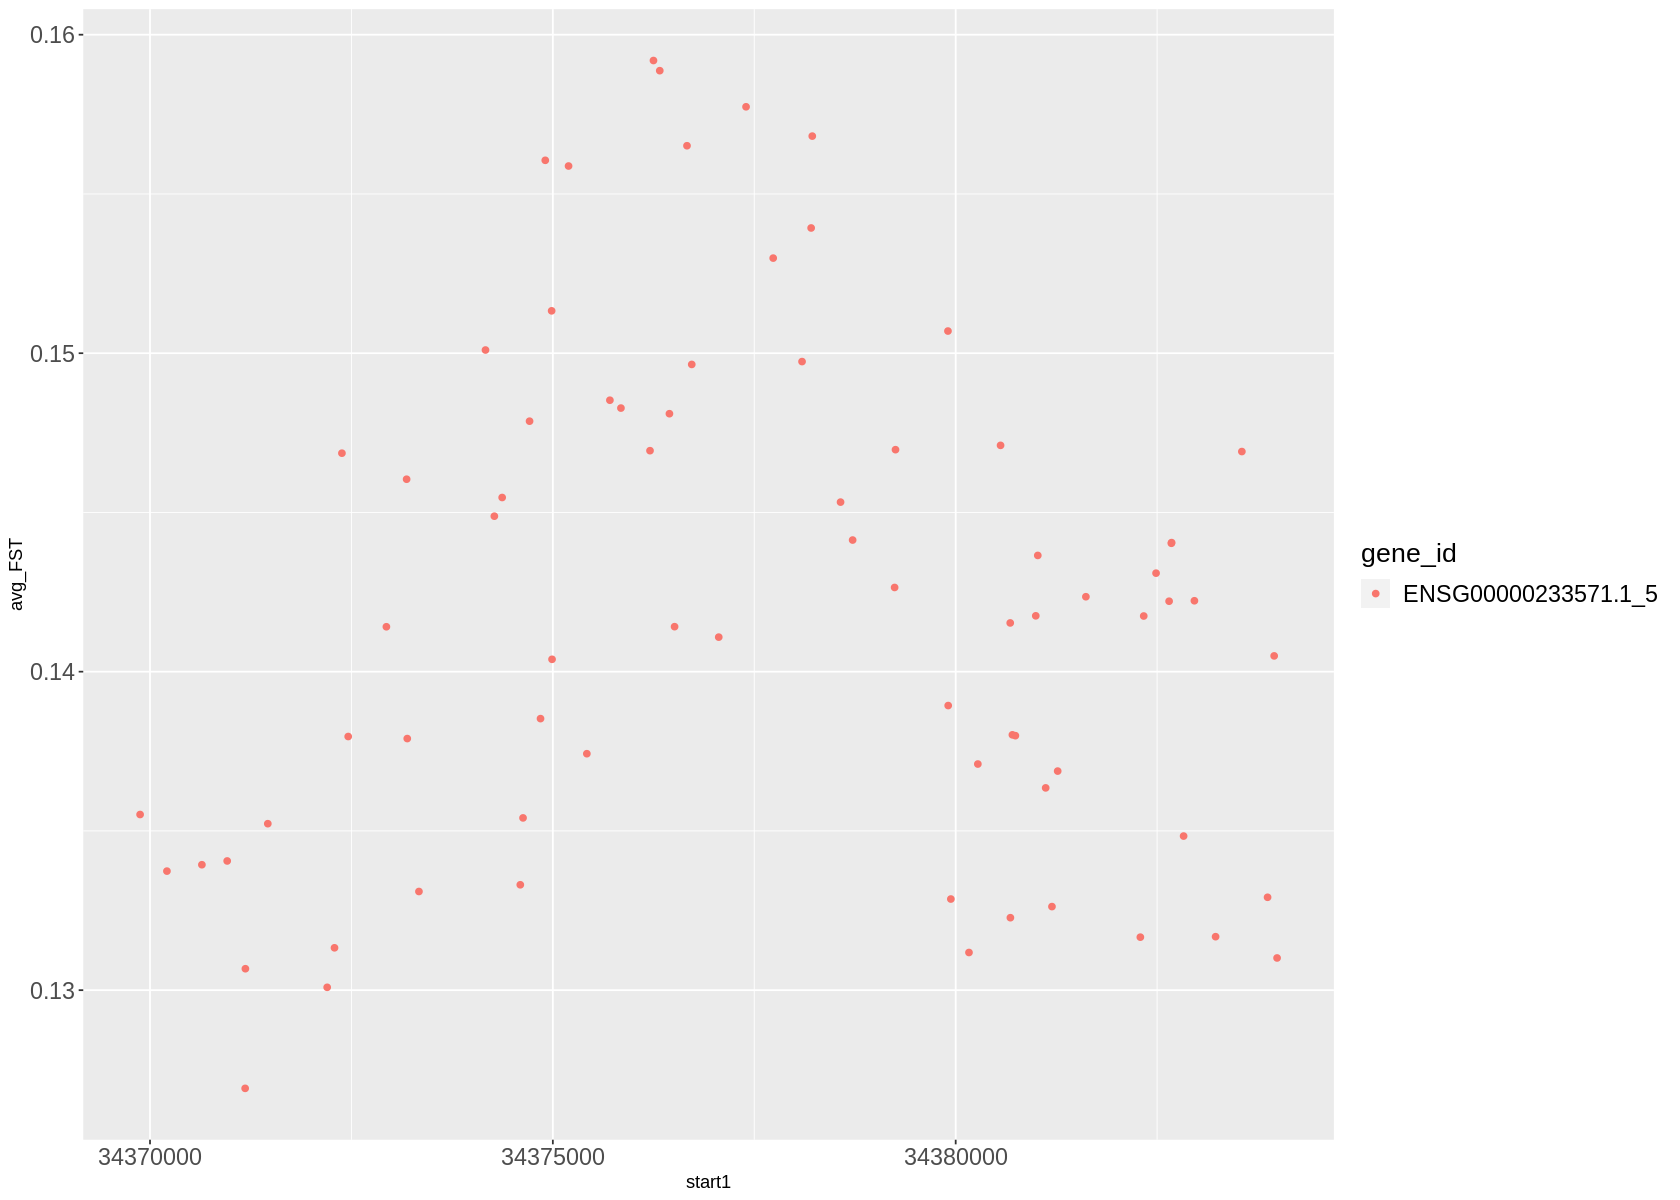

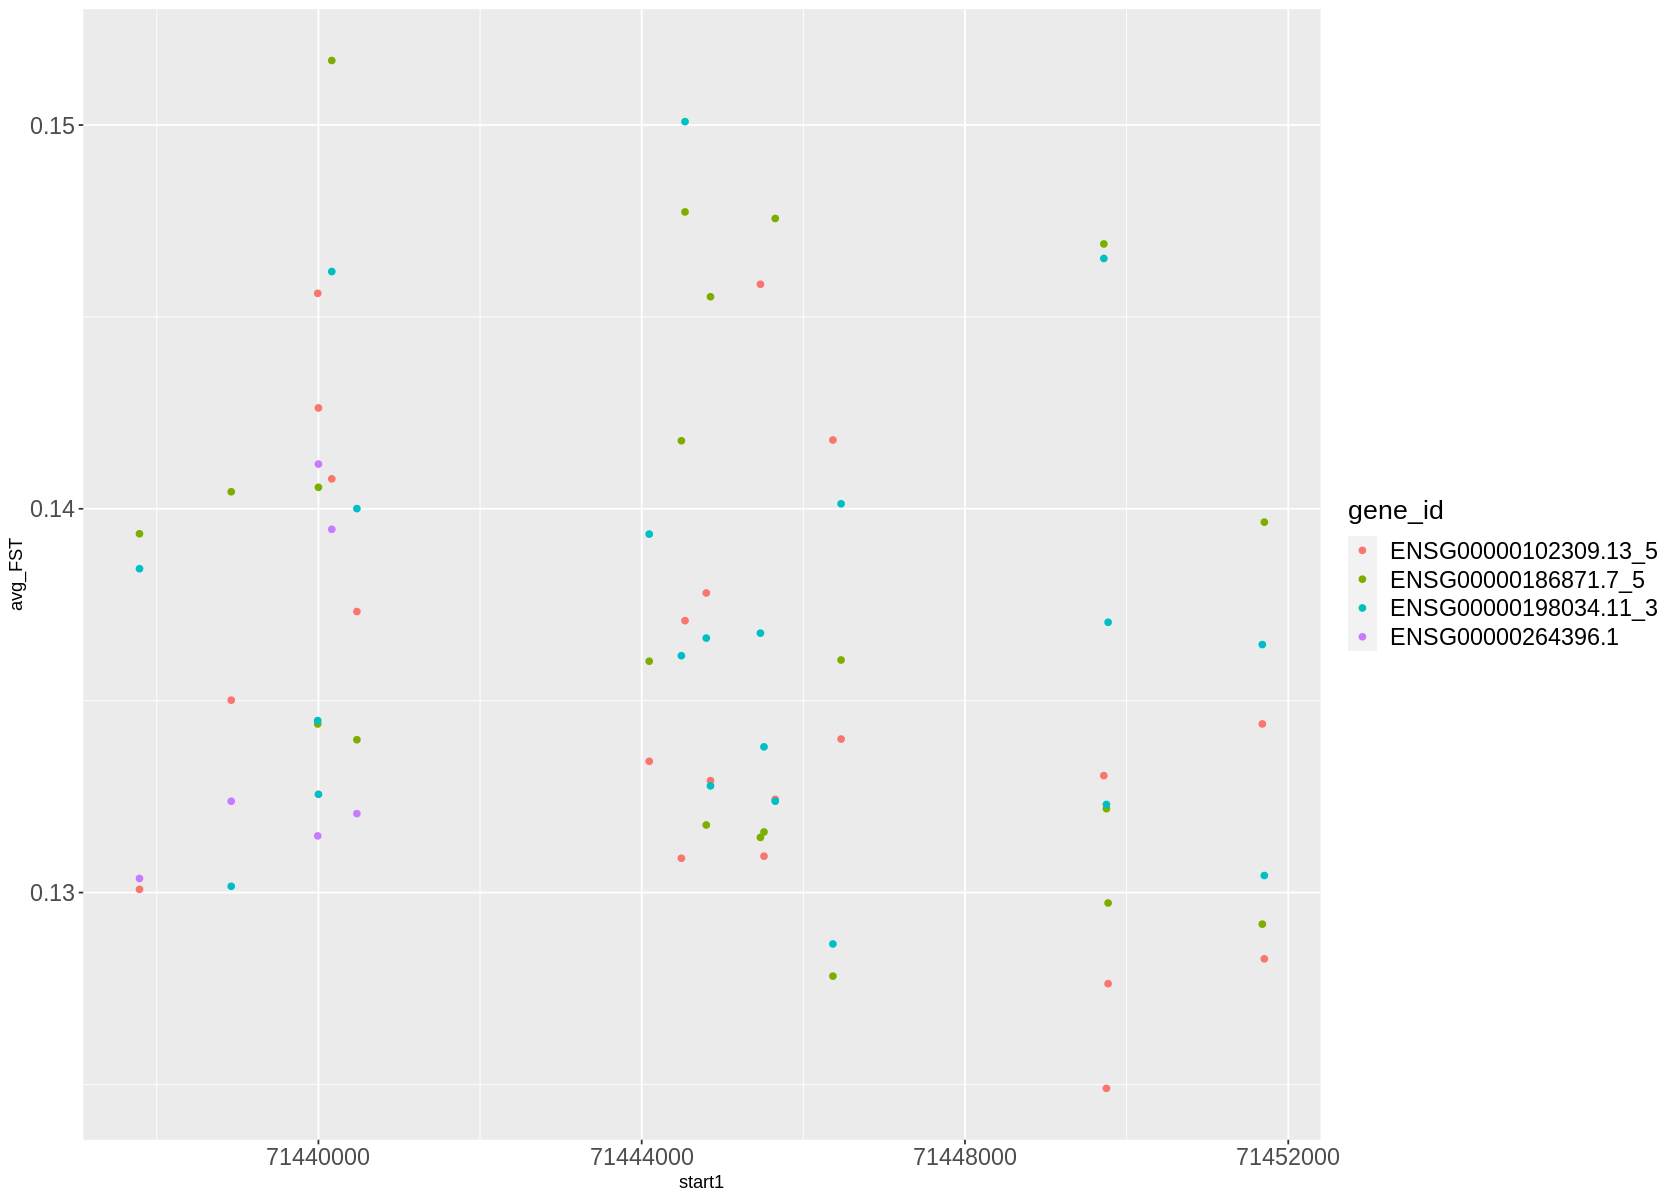

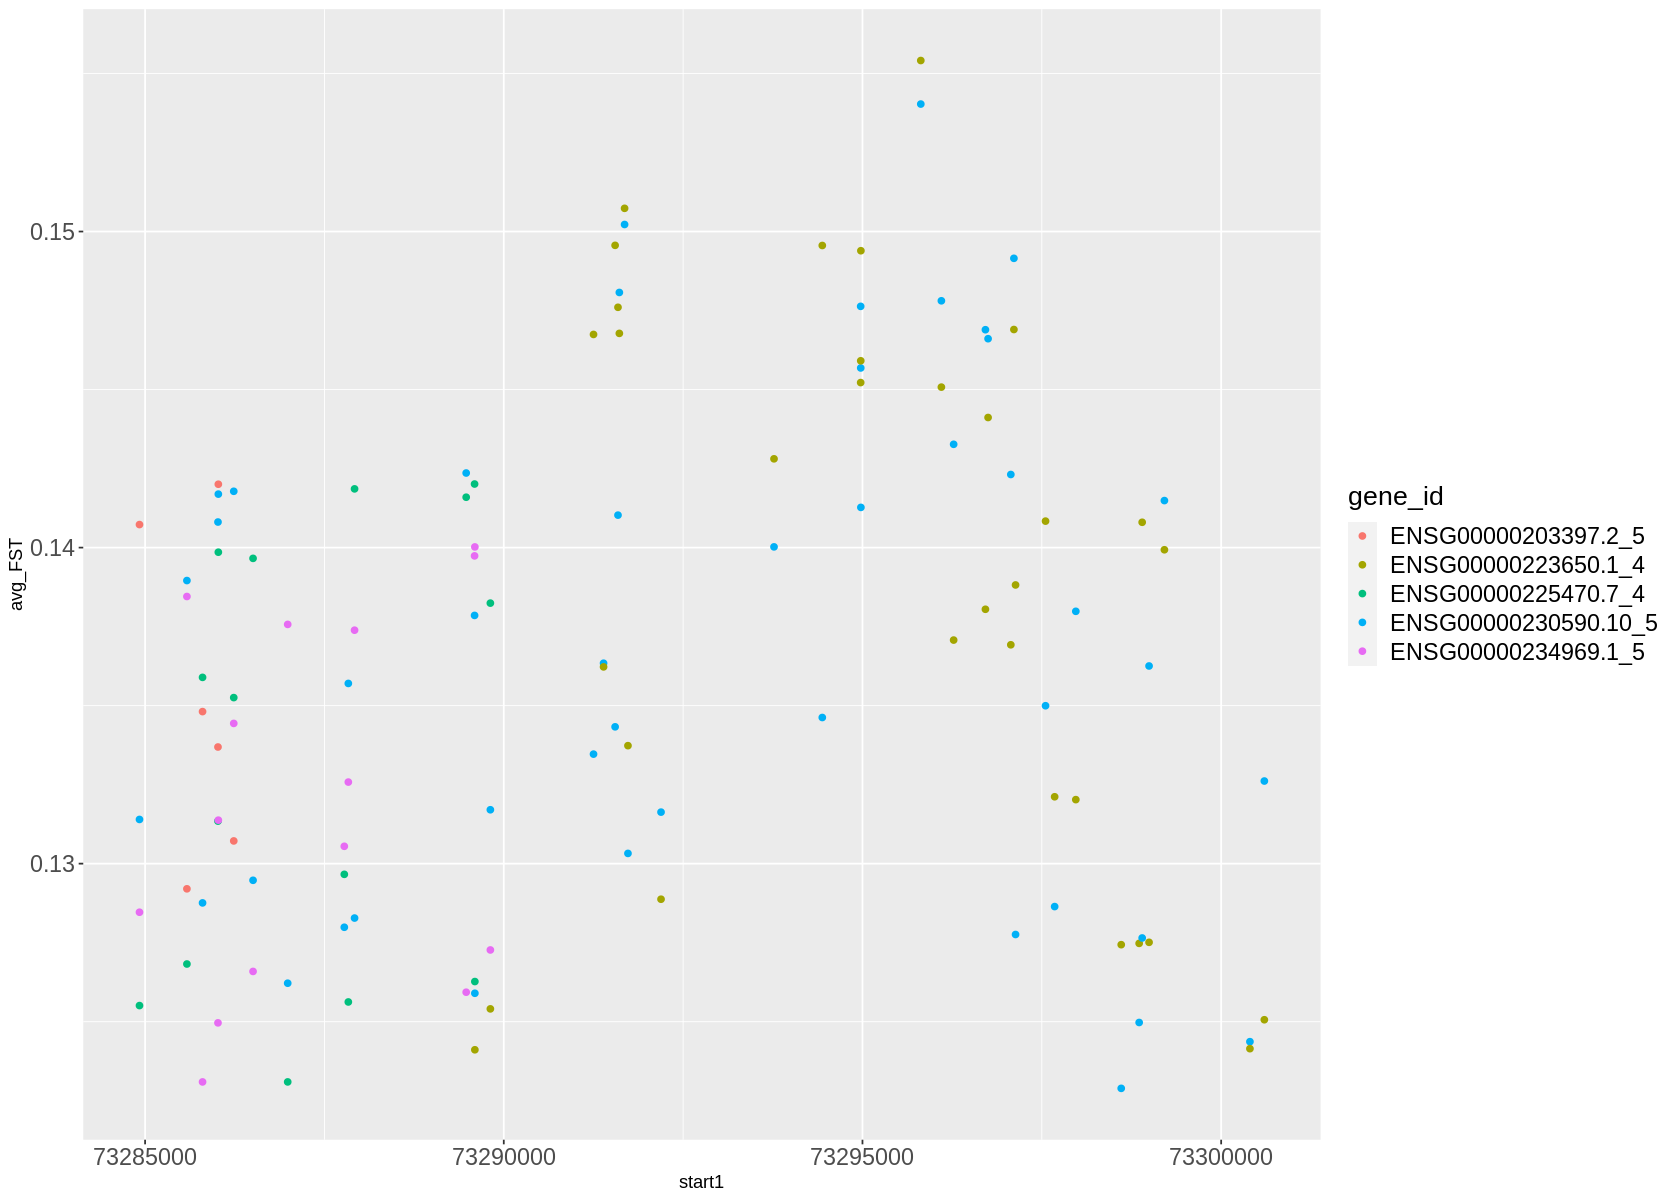

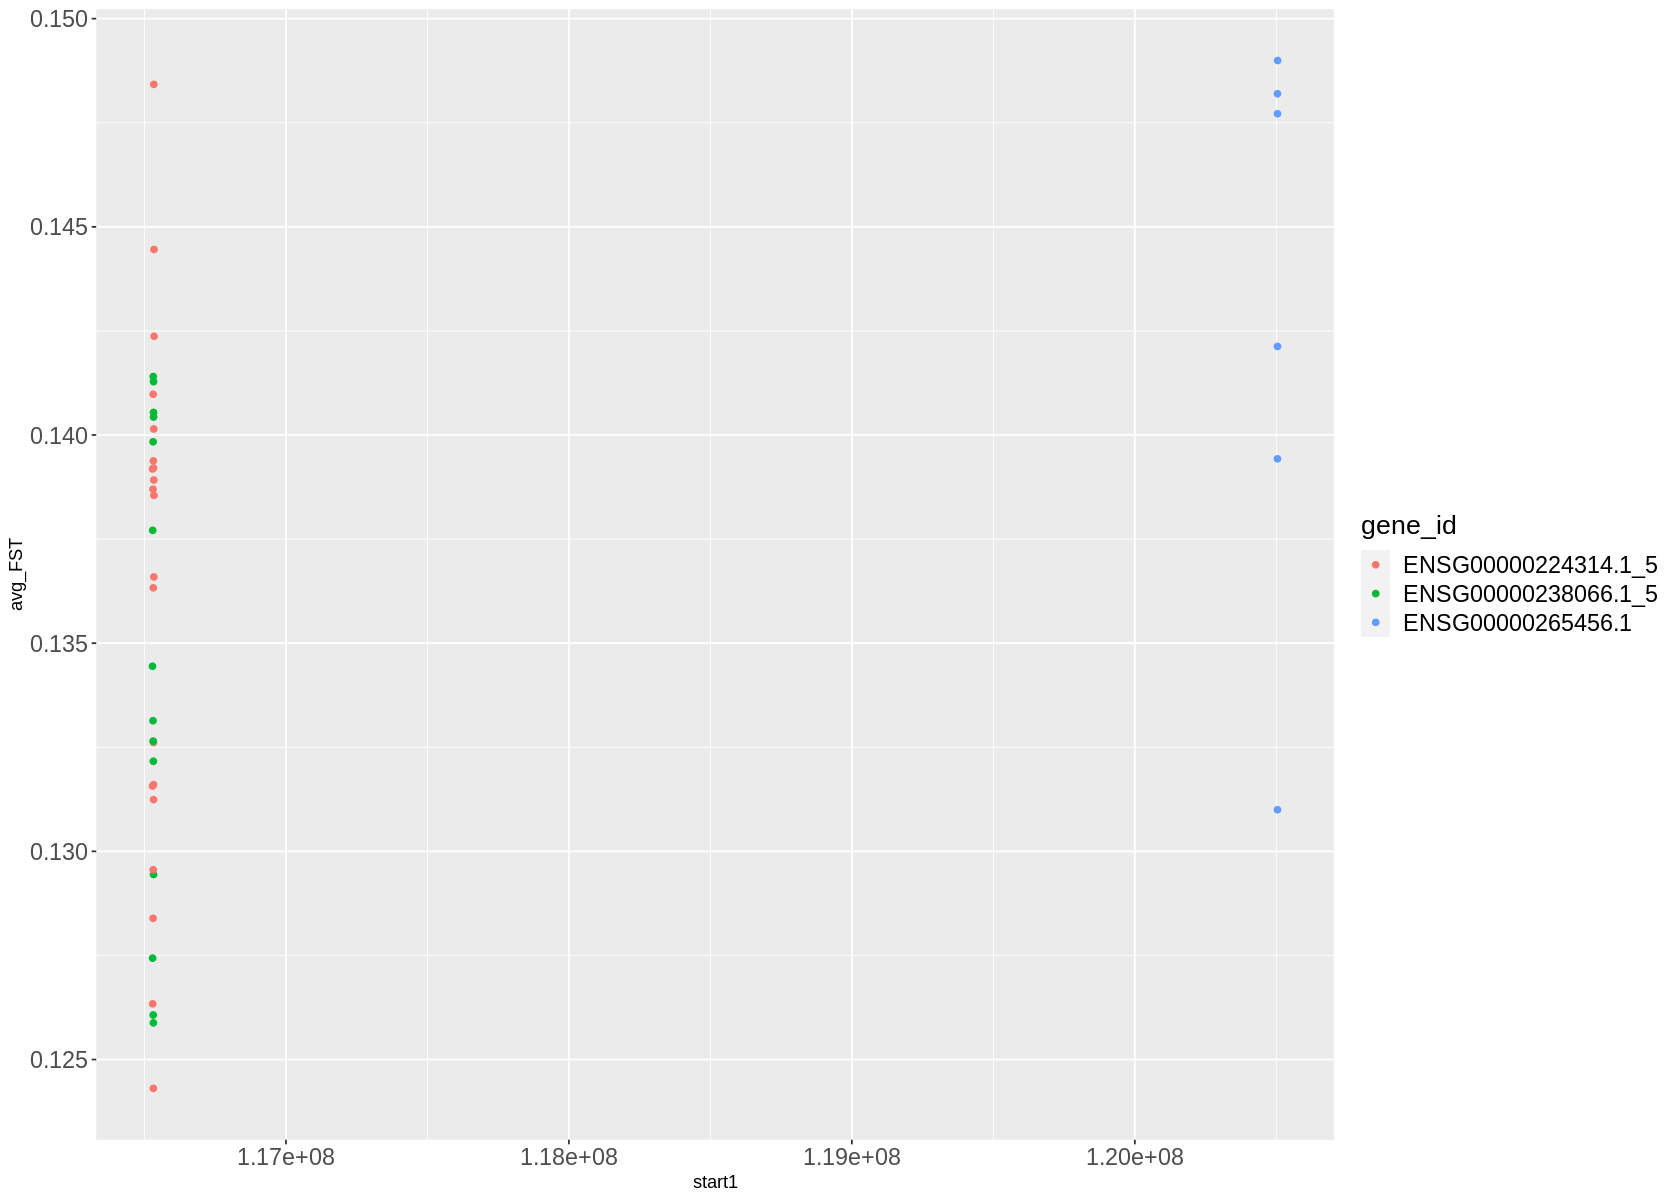

In [76]:
# explain potential adaptive explanations
options(repr.plot.width=14, repr.plot.height=10)

FST_WE_EA_500_genes <- read.table("FST_WE_EA_high_500_genes.bed", header = FALSE, sep = '\t')
colnames(FST_WE_EA_500_genes)  <- c("chr1", "start1", "end1", "avg_FST", "chr2", "start2", "end2", "gene_id", "overlap")

print(nrow(FST_WE_EA_500_genes  %>% filter(overlap == 0)))

FST_WE_EA_500_genes  <- FST_WE_EA_500_genes %>% filter(overlap != 0)  %>% 
    distinct_at(vars(chr1, start1, end1, gene_id), .keep_all = TRUE)
nrow(FST_WE_EA_500_genes)

ggplot() + geom_jitter(data = FST_WE_EA_500_genes, aes(x = start1, y = avg_FST, color = gene_id), width = 0.001, height = 0.01) +
    theme(
        legend.title = element_text(size = 16),
        legend.text = element_text(size = 14), 
        axis.text.x = element_text(size = 14), 
        axis.text.y = element_text(size = 14)
        )

FST_WE_EA_500_genes  %>% filter(start1 < 5.0e+07) %>% ggplot() + geom_jitter( aes(x = start1, y = avg_FST, color = gene_id), width = 0.001, height = 0.01) +
    theme(
        legend.title = element_text(size = 16),
        legend.text = element_text(size = 14), 
        axis.text.x = element_text(size = 14), 
        axis.text.y = element_text(size = 14)
        )

FST_WE_EA_500_genes  %>% filter(between(start1,  5.0e+07, 7.2e+07))  %>% ggplot() + geom_jitter( aes(x = start1, y = avg_FST, color = gene_id), width = 0.001, height = 0.01) +
    theme(
        legend.title = element_text(size = 16),
        legend.text = element_text(size = 14), 
        axis.text.x = element_text(size = 14), 
        axis.text.y = element_text(size = 14)
        )

FST_WE_EA_500_genes  %>% filter(between(start1, 7.2e+07, 1.0e+08))  %>% ggplot() + geom_jitter( aes(x = start1, y = avg_FST, color = gene_id), width = 0.001, height = 0.01) +
    theme(
        legend.title = element_text(size = 16),
        legend.text = element_text(size = 14), 
        axis.text.x = element_text(size = 14), 
        axis.text.y = element_text(size = 14)
        )
                                
FST_WE_EA_500_genes  %>% filter(start1 >  1.0e+08)  %>% ggplot() + geom_jitter( aes(x = start1, y = avg_FST, color = gene_id), width = 0.001, height = 0.01) +
    theme(
        legend.title = element_text(size = 16),
        legend.text = element_text(size = 14), 
        axis.text.x = element_text(size = 14), 
        axis.text.y = element_text(size = 14)
        )



gene_names_WE_EA_FST  <- (unique(FST_WE_EA_500_genes[c("gene_id")]))

write_delim(gene_names_WE_EA_FST, "gene_names_WE_EA_FST.csv", delim = "\t", col_names = TRUE)

In [71]:
gene_names_WE_EA_FST  

,gene_id
,<chr>
1,ENSG00000233571.1_5
11,ENSG00000230590.10_5
12,ENSG00000223650.1_4
40,ENSG00000264396.1
41,ENSG00000186871.7_5
42,ENSG00000102309.13_5
43,ENSG00000198034.11_3
47,ENSG00000265456.1
74,ENSG00000224314.1_5


In [72]:
min((FST_WE_EA_500_genes  %>% filter(gene_id == "ENSG00000233571.1_5") %>% select(start1))[[1]])

min((FST_WE_EA_500_genes  %>% filter(gene_id == "ENSG00000230590.10_5") %>% select(start1))[[1]])

min((FST_WE_EA_500_genes  %>% filter(gene_id == "ENSG00000223650.1_4") %>% select(start1))[[1]])

min((FST_WE_EA_500_genes  %>% filter(gene_id == "ENSG00000264396.1") %>% select(start1))[[1]])

min((FST_WE_EA_500_genes  %>% filter(gene_id == "ENSG00000186871.7_5") %>% select(start1))[[1]])

min((FST_WE_EA_500_genes  %>% filter(gene_id == "ENSG00000102309.13_5") %>% select(start1))[[1]])

min((FST_WE_EA_500_genes  %>% filter(gene_id == "ENSG00000198034.11_3") %>% select(start1))[[1]])

min((FST_WE_EA_500_genes  %>% filter(gene_id == "ENSG00000265456.1") %>% select(start1))[[1]])

min((FST_WE_EA_500_genes  %>% filter(gene_id == "ENSG00000224314.1_5") %>% select(start1))[[1]])

min((FST_WE_EA_500_genes  %>% filter(gene_id == "ENSG00000238066.1_5") %>% select(start1))[[1]])

min((FST_WE_EA_500_genes  %>% filter(gene_id == "ENSG00000225470.7_4") %>% select(start1))[[1]])

min((FST_WE_EA_500_genes  %>% filter(gene_id == "ENSG00000203397.2_5") %>% select(start1))[[1]])

min((FST_WE_EA_500_genes  %>% filter(gene_id == "ENSG00000234969.1_5") %>% select(start1))[[1]])


[1] 34369877

[1] 73284922

[1] 73289597

[1] 71437786

[1] 71437786

[1] 71437786

[1] 71437786

[1] 120503856

[1] 116528400

[1] 116528400

[1] 73284922

[1] 73284922

[1] 73284922

In [39]:
intersect(gene_names_AF_WE_FST, gene_names_EA_AF_FST)

intersect(gene_names_AF_WE_FST, gene_names_WE_EA_FST)

intersect(gene_names_EA_AF_FST, gene_names_WE_EA_FST)

gene_id
<chr>
ENSG00000214745.2_5
ENSG00000227486.1_6


gene_id
<chr>


gene_id
<chr>


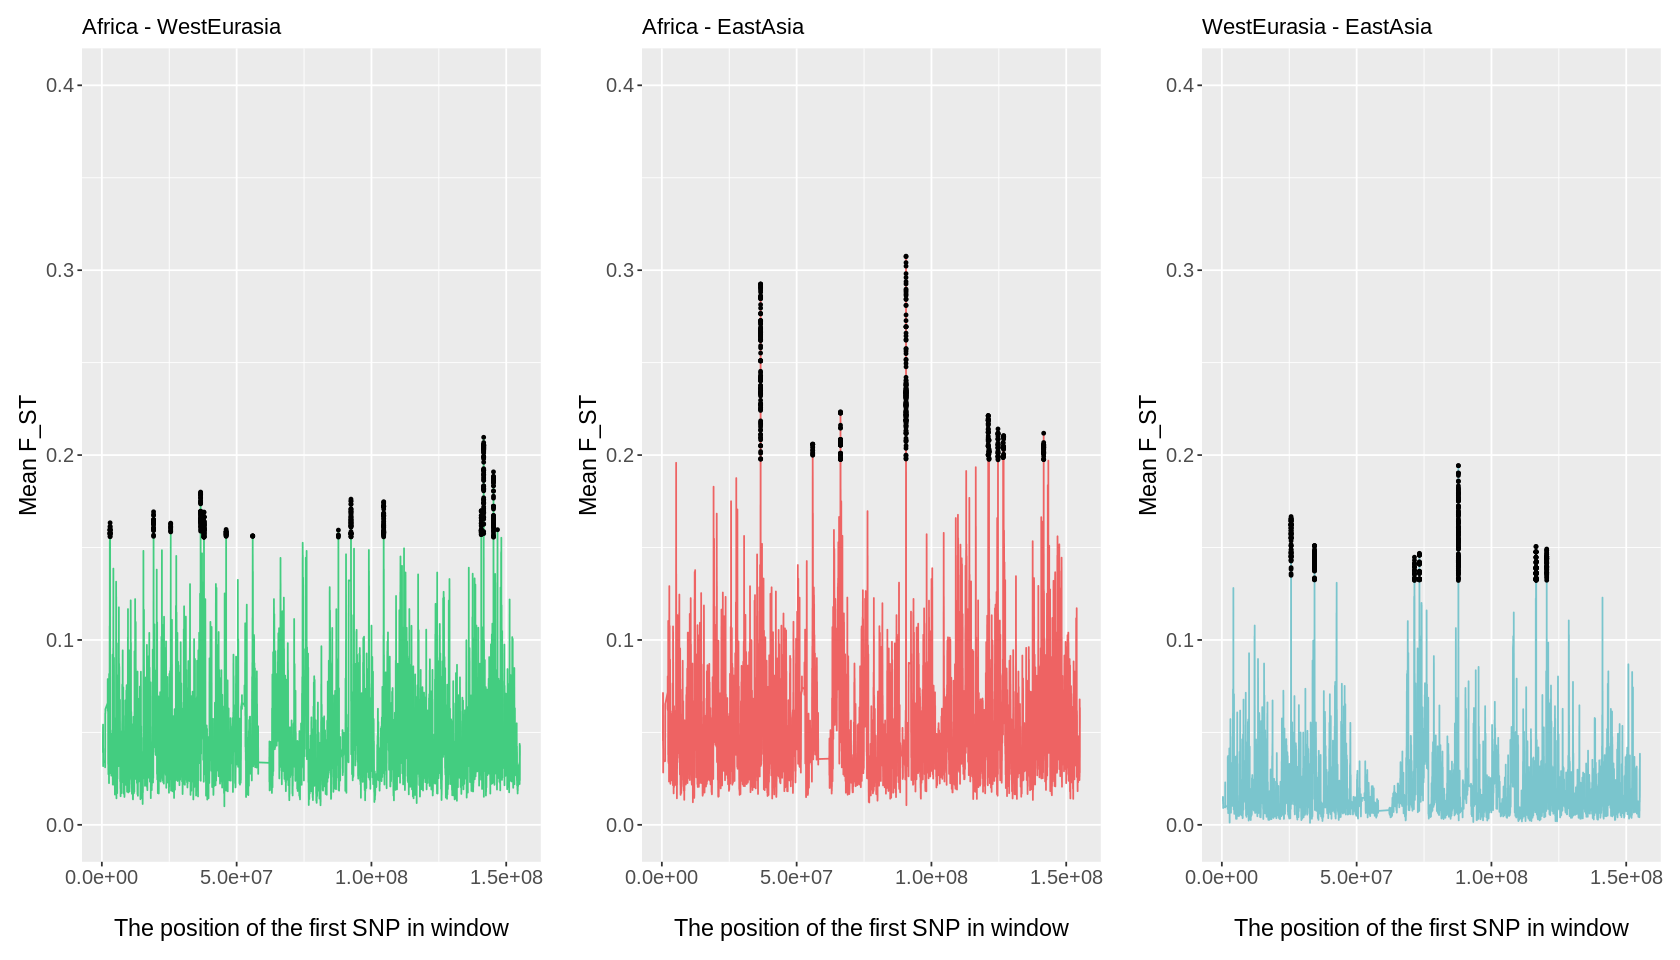

In [31]:

options(repr.plot.width=14, repr.plot.height=8)



AF_WE_plot  <- ggplot() + 
    geom_line(data = FST_AF_WE_averaged_in_sliding_window, aes(x = first_snp_pos, y = avg_FST), color = "seagreen3", show.legend = F) + 
    geom_point(data = FST_AF_WE_avg_in_window_high, aes(x = first_snp_pos, y = avg_FST), size = 0.7) + 
    ggtitle("Africa - WestEurasia") + ylim(0, 0.4) + xlab("\nThe position of the first SNP in window") + ylab("Mean F_ST") + 
    theme(
        axis.text.x = element_text(size = 12), 
        axis.text.y = element_text(size = 12), 
        axis.title=element_text(size=14)
        )

AF_EA_plot  <- ggplot() + 
    geom_line(data = FST_EA_AF_averaged_in_sliding_window, aes(x = first_snp_pos, y = avg_FST), color = "indianred2", show.legend = F) + 
    geom_point(data = FST_EA_AF_avg_in_window_high, aes(x = first_snp_pos, y = avg_FST), size = 0.7) + 
    ggtitle("Africa - EastAsia") + ylim(0, 0.4) + xlab("\nThe position of the first SNP in window") + ylab("Mean F_ST") + 
    theme(
        axis.text.x = element_text(size = 12), 
        axis.text.y = element_text(size = 12), 
        axis.title=element_text(size=14)
        )

WE_EA_plot  <- ggplot() + 
    geom_line(data = FST_WE_EA_averaged_in_sliding_window, aes(x = first_snp_pos, y = avg_FST), color = "cadetblue3", show.legend = F) + 
    geom_point(data = FST_WE_EA_avg_in_window_high , aes(x = first_snp_pos, y = avg_FST), size = 0.7) + 
    ggtitle("WestEurasia - EastAsia") + ylim(0, 0.4) + xlab("\nThe position of the first SNP in window") + ylab("Mean F_ST") + 
    theme(
        axis.text.x = element_text(size = 12), 
        axis.text.y = element_text(size = 12), 
        axis.title=element_text(size=14)
        )

mm <- theme(plot.margin=unit(rep(0.8,4), "line"))
gridExtra::grid.arrange(AF_WE_plot+mm, AF_EA_plot +mm, WE_EA_plot +mm,ncol=3)


